In [1]:
import yfinance as yf
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
TICKERS = ["SPY", "SH", "SDS", "UPRO", "SSO", "SPXU"]
LEVERAGES = {"SPY": "1x", "SSO": "2x", "UPRO": "3x", "SH":"-1x", "SDS":"-2x", "SPXU": "-3x"}

In [3]:
TICKERS2INDEX = {'SPY': 0, 'SH': 1, 'SDS': 2, 'UPRO': 3, 'SSO': 4, 'SPXU': 5}

In [283]:
# sns.set(rc={'figure.figsize':(8,5)})

## 1. Data Exploration - Close Price version

In [106]:
def collect_historical(ticker):
    ticker_class = yf.Ticker(ticker)
    
    # Get historical adjusted price, from the first day traded
    # Adjusted for both dividends and splits
    hist = ticker_class.history(period="max")
    
    return hist

In [107]:
data = dict()

for ticker in TICKERS:
    data[ticker] = collect_historical(ticker)

In [142]:
def plot(y_ticker, x_ticker, period=None, price_type="Close"):
    """ 
    Usage: To do a linear regression of y=SPY on x=SH, call `plot("SPY", "SH")`
    This function plots two graph about the relationship between two tickers, and do OLS with them.
        plot 1: The scatter plot of two etf prices
        plot 2: The lineplot of two etf prices over time
    Arguments:
        y_ticker: ticker of the etf to be the dependent variable
        x_ticker: ticker of the etf to be the independent variable
        period (day): If given, use the last `period` number of closed price 
                    If not given, use all the data since both tickers are traded
    """
    
    y = data[y_ticker][price_type] if y_ticker in data else collect_historical(y_ticker)
    x = data[x_ticker][price_type] if x_ticker in data else collect_historical(x_ticker)
    
    period = min(len(y), len(x)) if period == None else period
    y = y[-period:]
    x = x[-period:]
    
    data_pair = pd.DataFrame()
    data_pair[x_ticker], data_pair[y_ticker], data_pair["Year"] = x, y, list(map(lambda x: str(x.year), x.index))
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Relationship between {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.scatterplot(data=data_pair, x=x_ticker, y=y_ticker, hue="Year")
    
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()
    constant = result.params[0]
    slope = result.params[1]
    plt.text((max(x["Close"]) + min(x["Close"])) / 2, 0.95*max(y), r'${}={}*{} + {}$'.format(
        y_ticker, round(slope, 2), x_ticker, round(constant, 2)), fontsize=20, ha='center')
    
    plt.subplot(1,2,2)
    plt.title("Price Movement of {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.lineplot(data=data_pair)
    plt.ylabel("Price")
    plt.show()
    plt.close()
    
    return data_pair, slope, constant

### (a) Use all the data since the ticker is first traded

1. Relationship between SPY(1x) and SH(-1x)


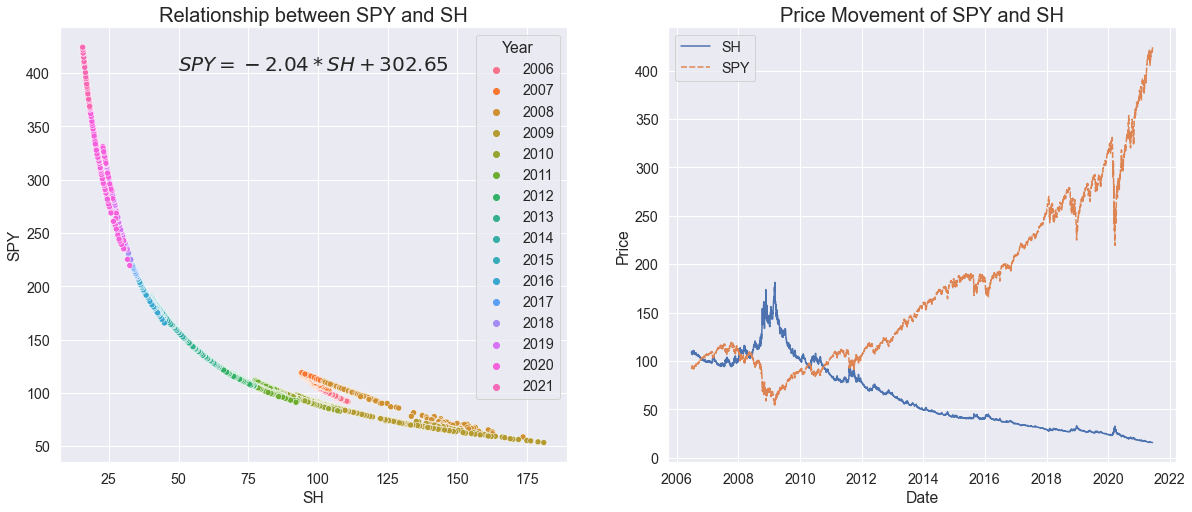

2. Relationship between SPY(1x) and SDS(-2x)


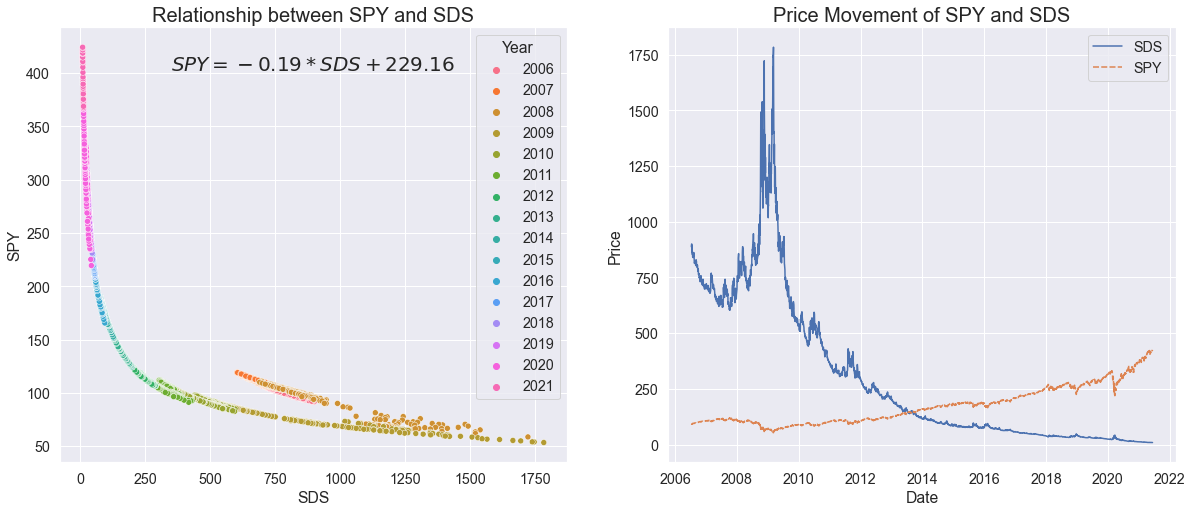

3. Relationship between SPY(1x) and UPRO(3x)


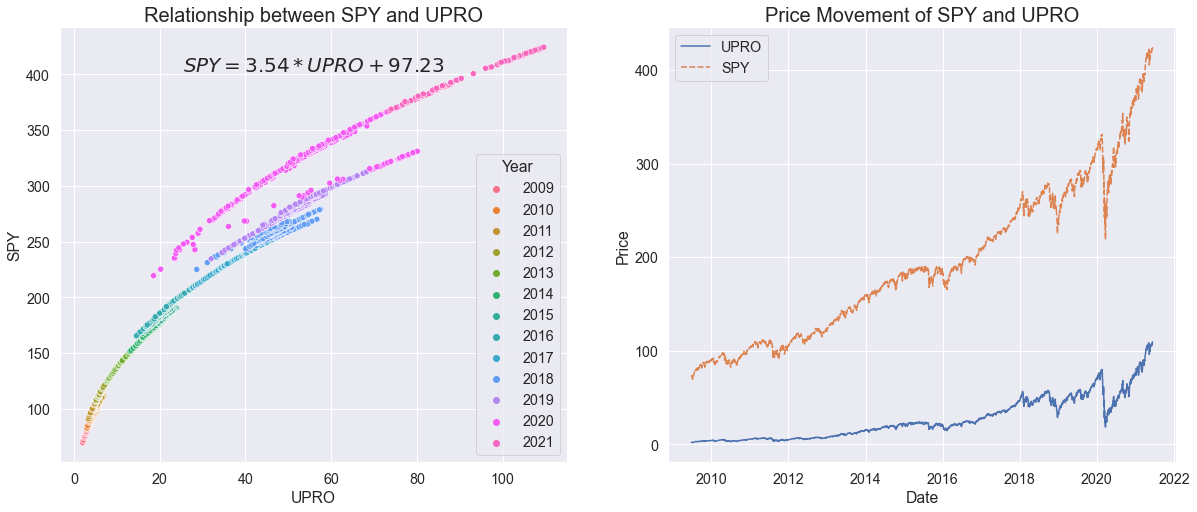

4. Relationship between SPY(1x) and SSO(2x)


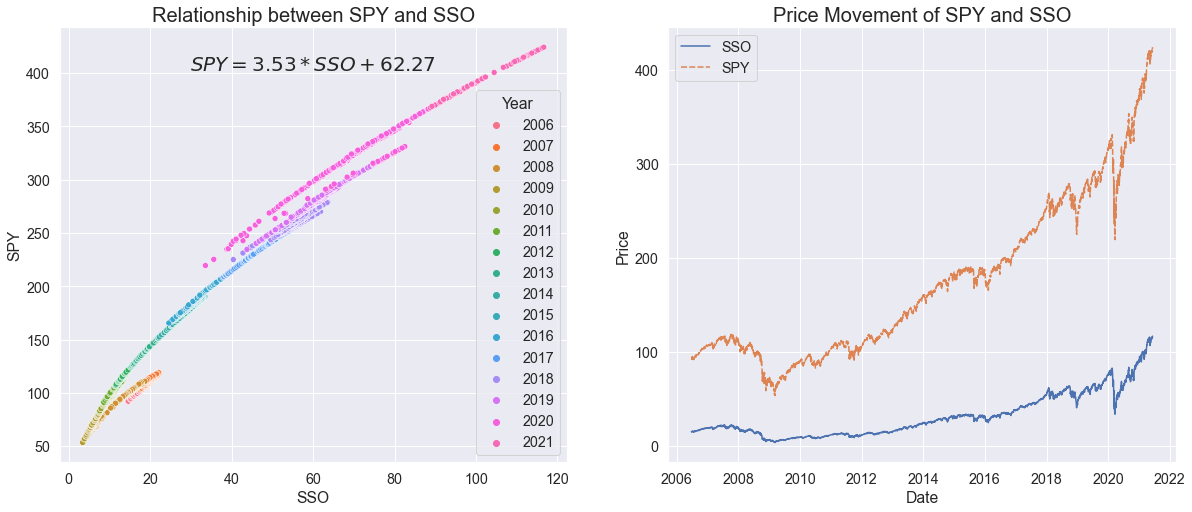

5. Relationship between SPY(1x) and SPXU(-3x)


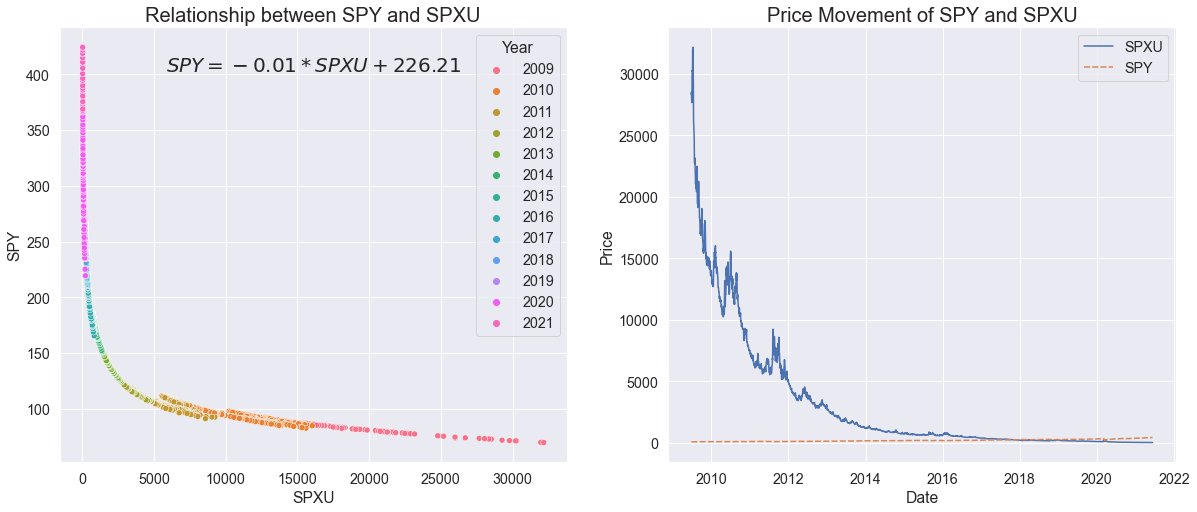

6. Relationship between SH(-1x) and SDS(-2x)


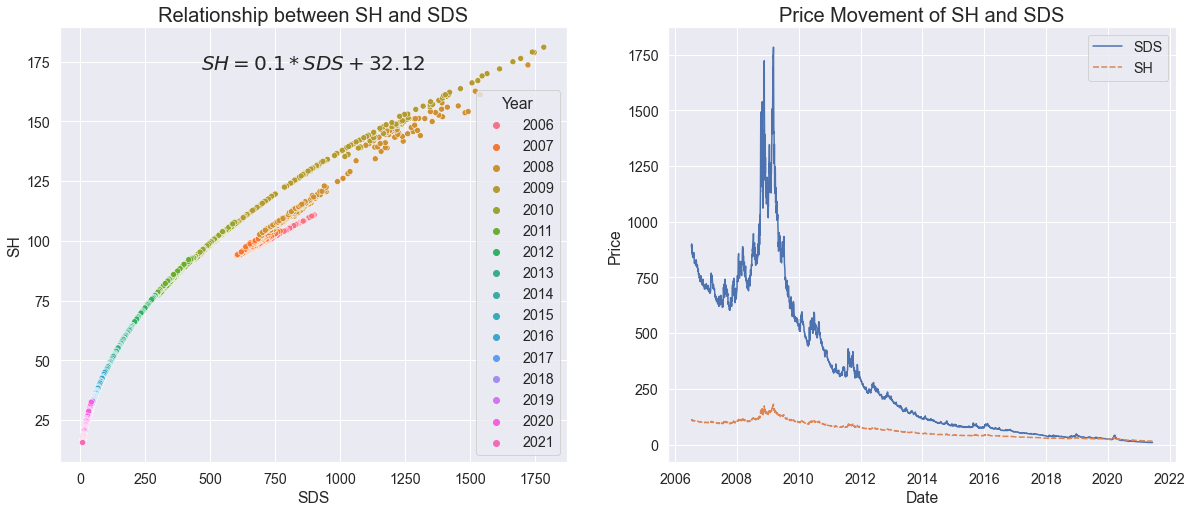

7. Relationship between SH(-1x) and UPRO(3x)


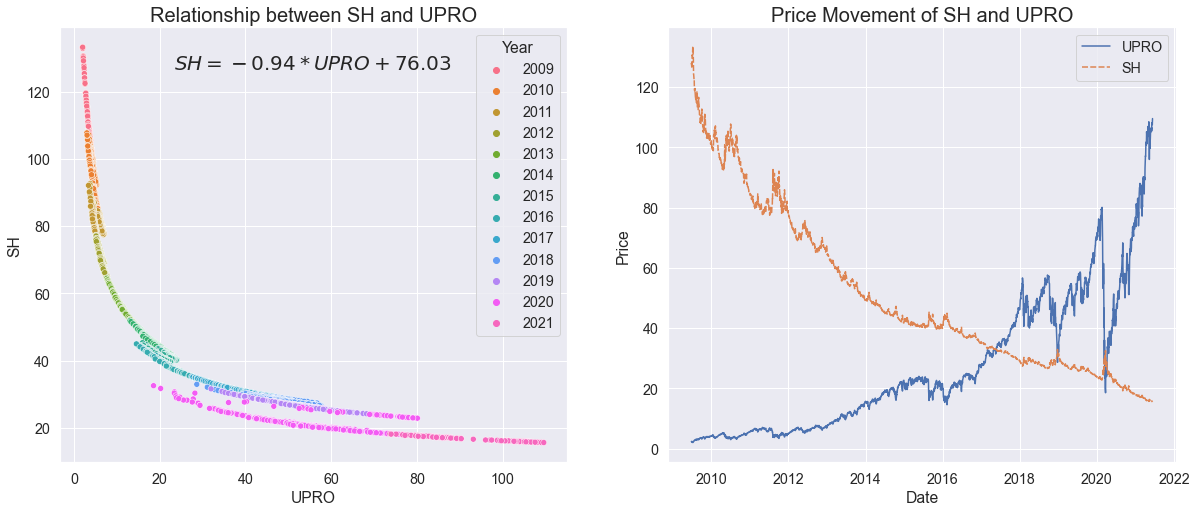

8. Relationship between SH(-1x) and SSO(2x)


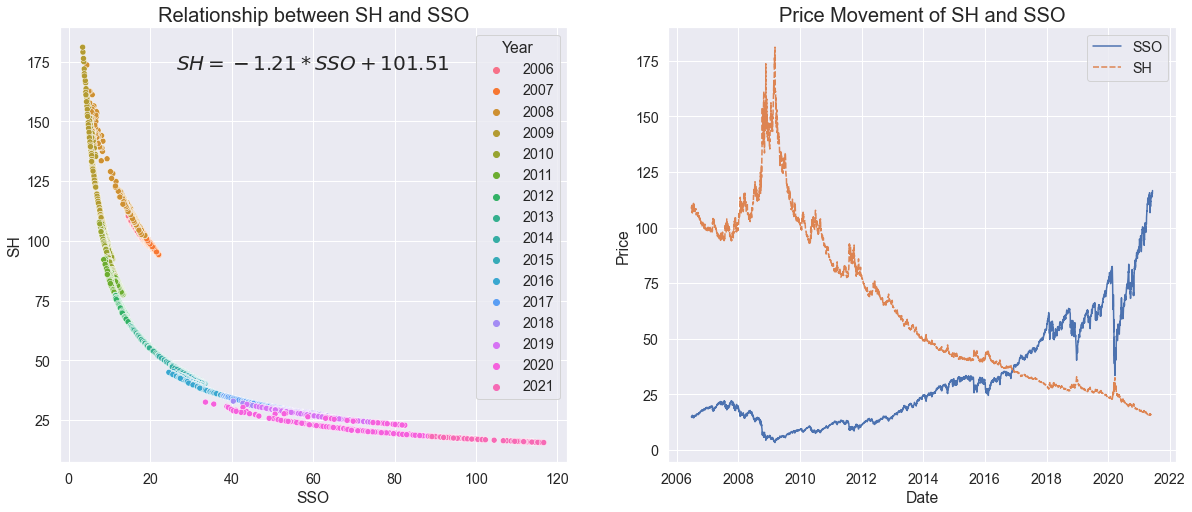

9. Relationship between SH(-1x) and SPXU(-3x)


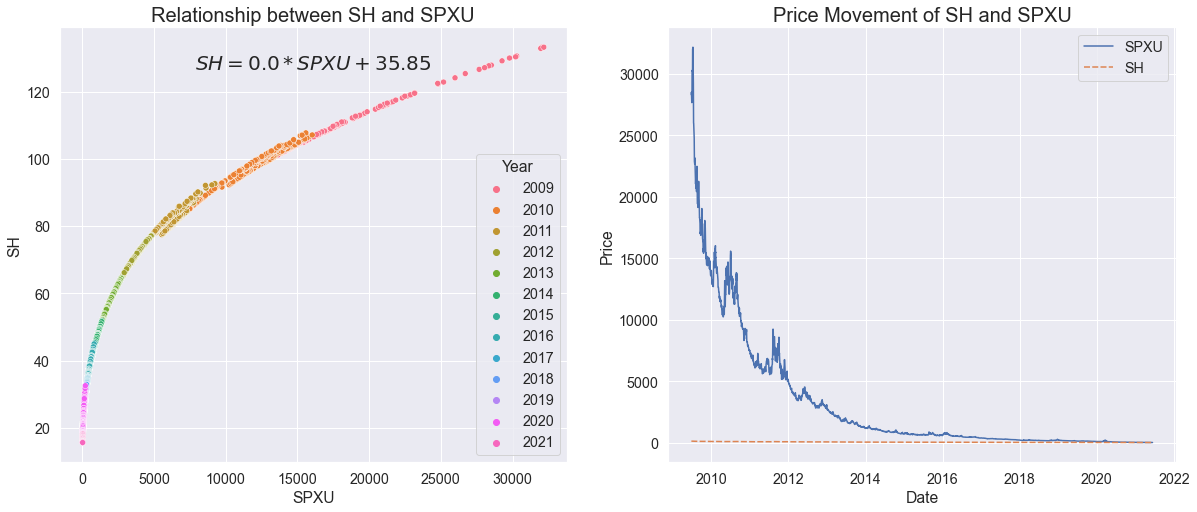

10. Relationship between SDS(-2x) and UPRO(3x)


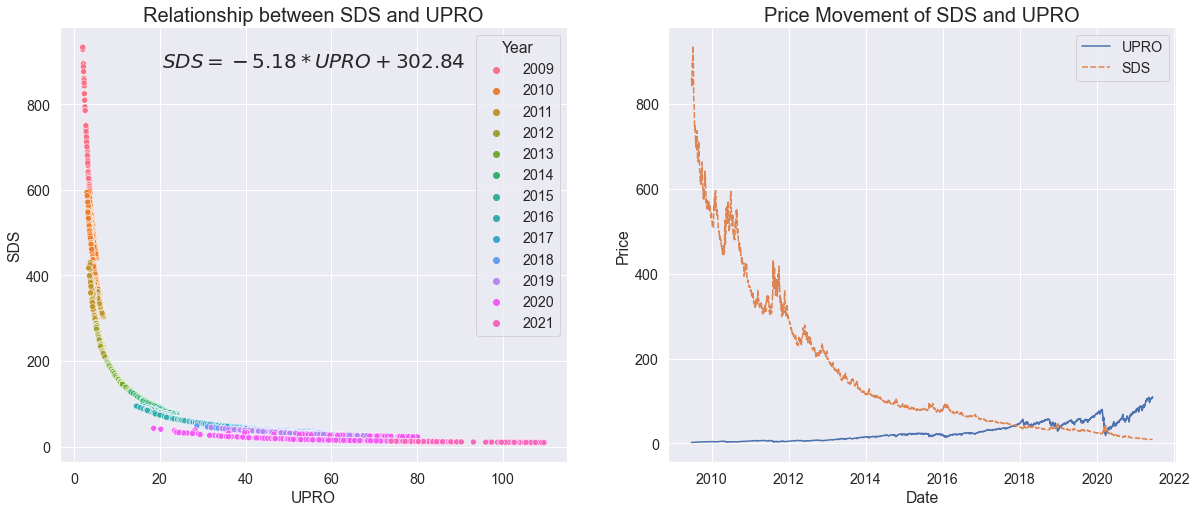

11. Relationship between SDS(-2x) and SSO(2x)


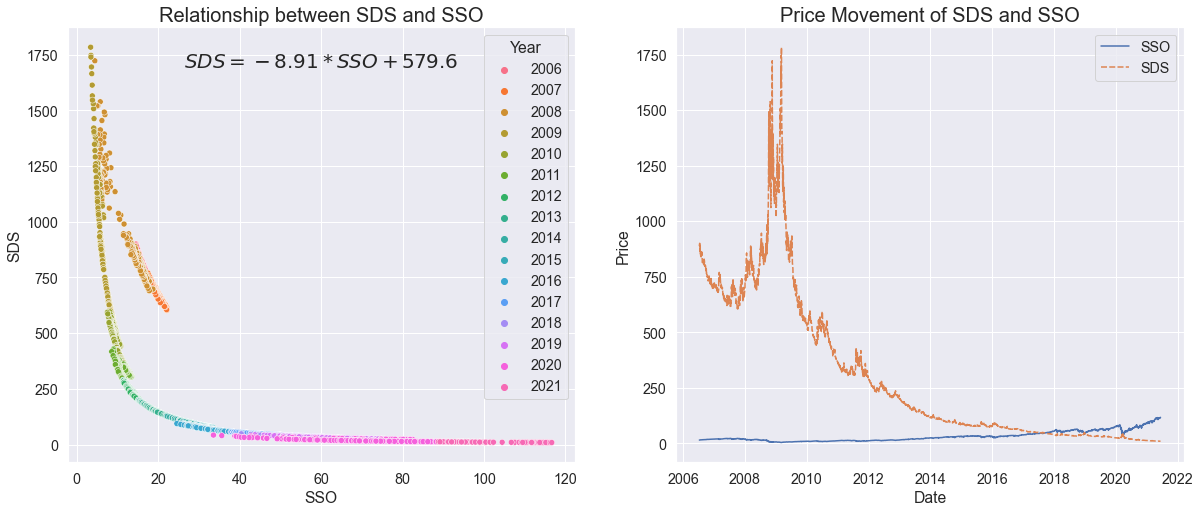

12. Relationship between SDS(-2x) and SPXU(-3x)


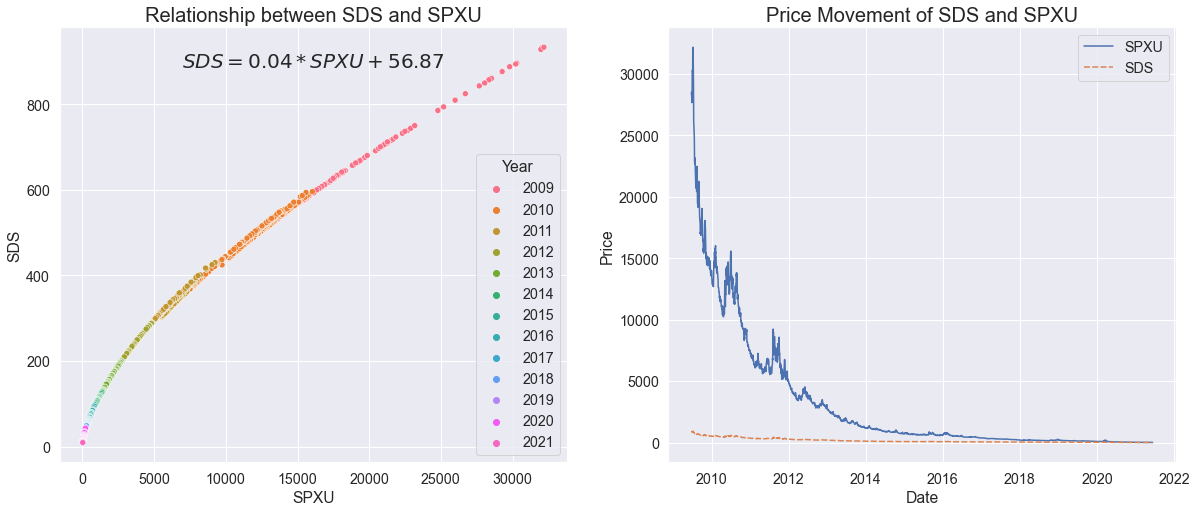

13. Relationship between UPRO(3x) and SSO(2x)


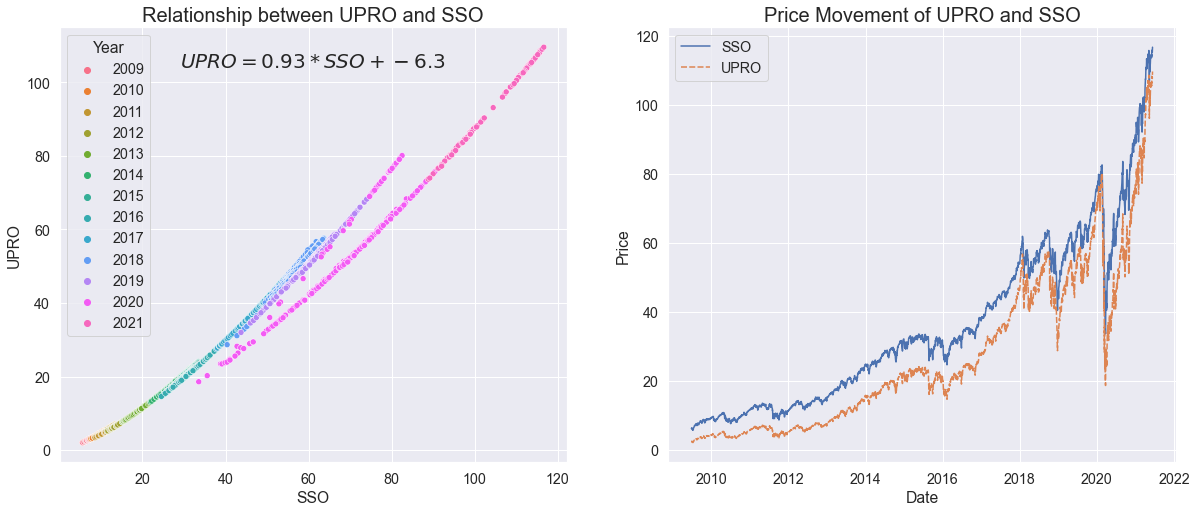

14. Relationship between UPRO(3x) and SPXU(-3x)


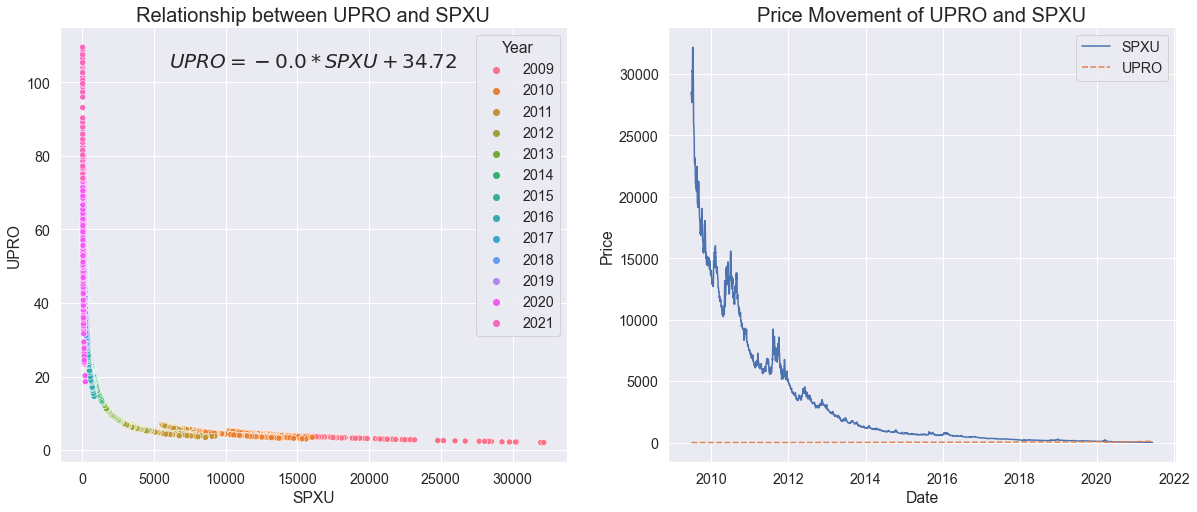

15. Relationship between SSO(2x) and SPXU(-3x)


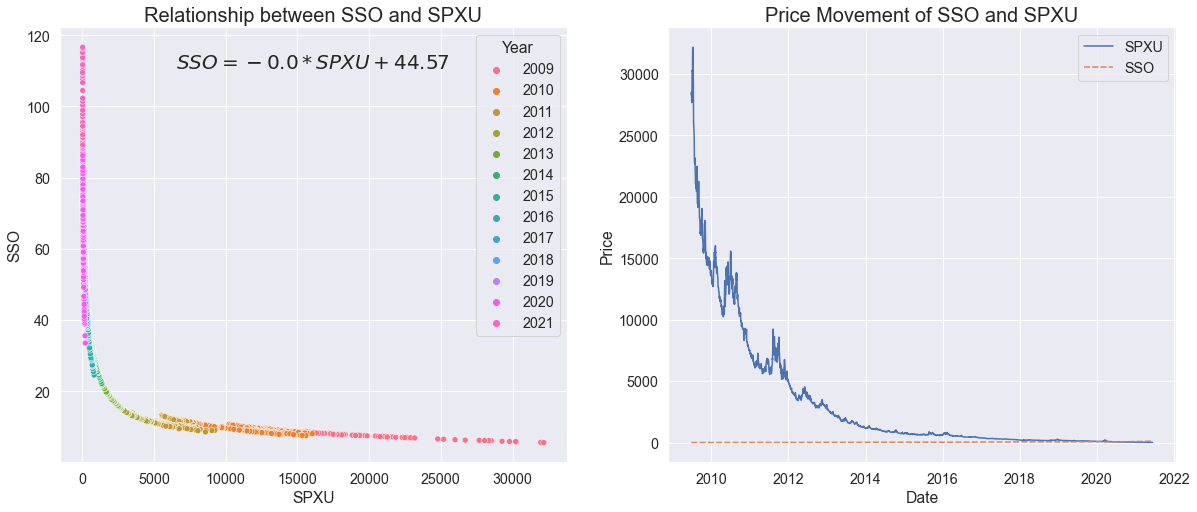

In [287]:
period = None # Number of samples to plot
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(TICKERS, 2)):
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant = plot(x_ticker, y_ticker, period)

### (b) Use two years data

1. Relationship between SPY(1x) and SH(-1x)


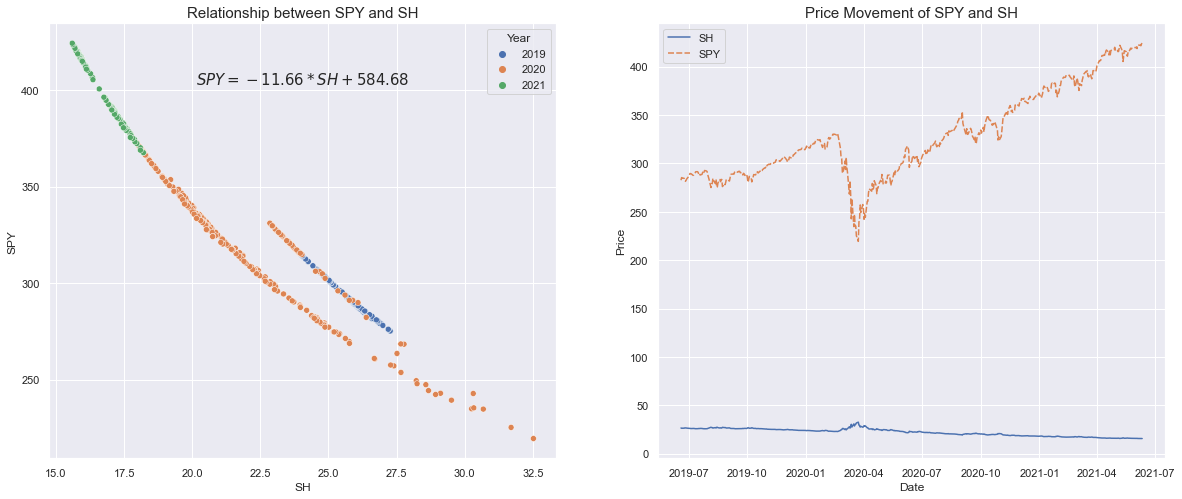

2. Relationship between SPY(1x) and SDS(-2x)


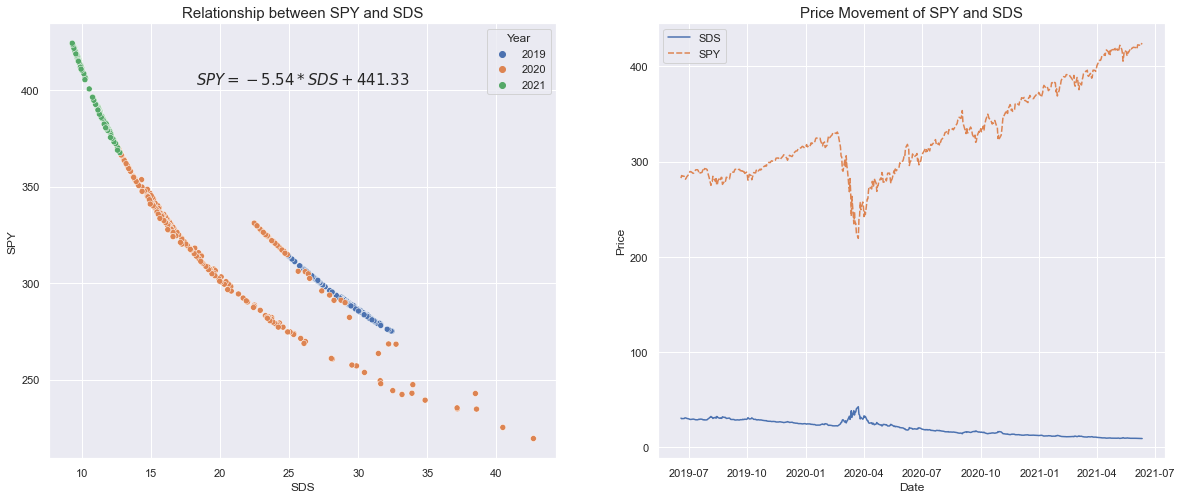

3. Relationship between SPY(1x) and UPRO(3x)


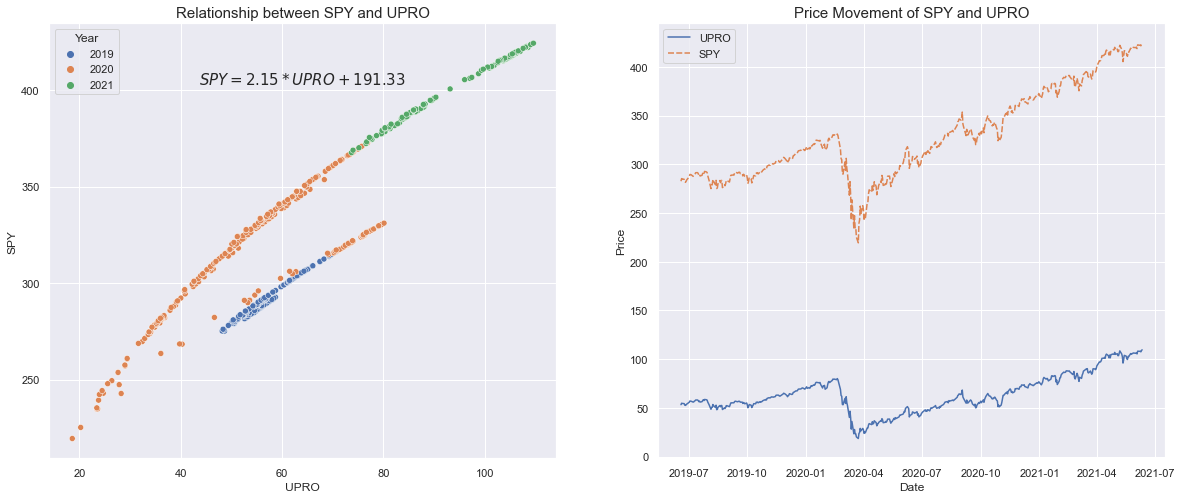

4. Relationship between SPY(1x) and SSO(2x)


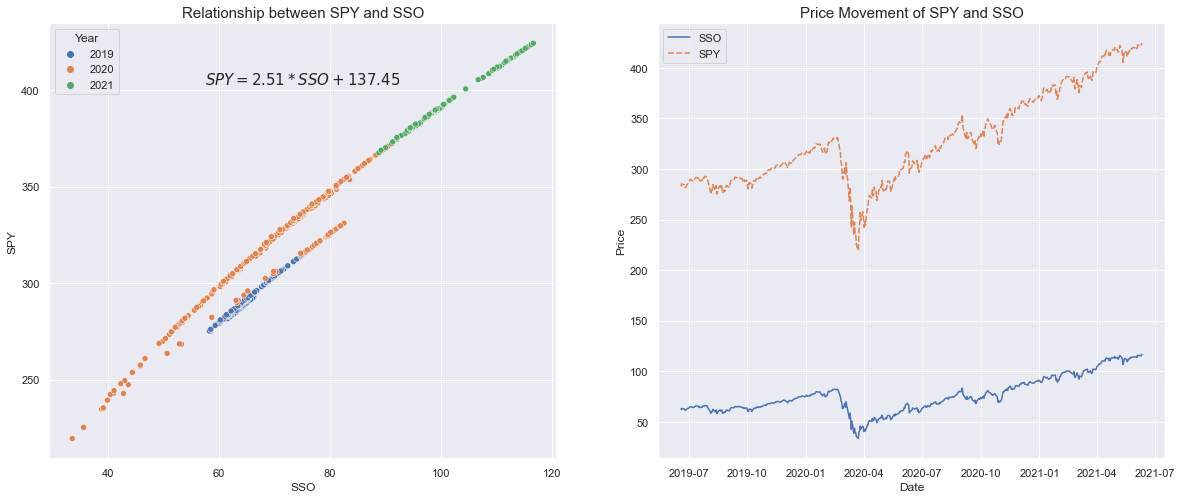

5. Relationship between SPY(1x) and SPXU(-3x)


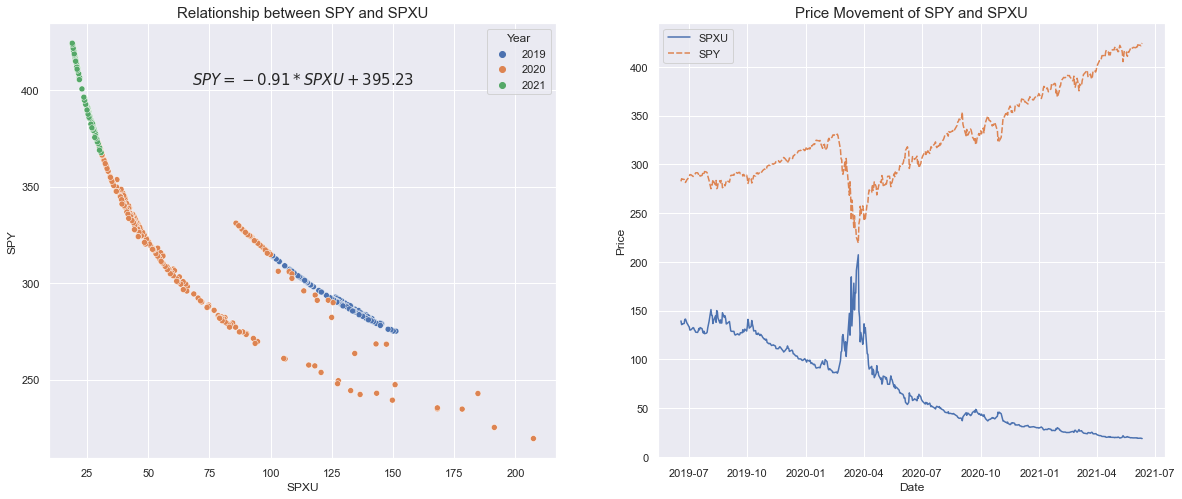

6. Relationship between SH(-1x) and SDS(-2x)


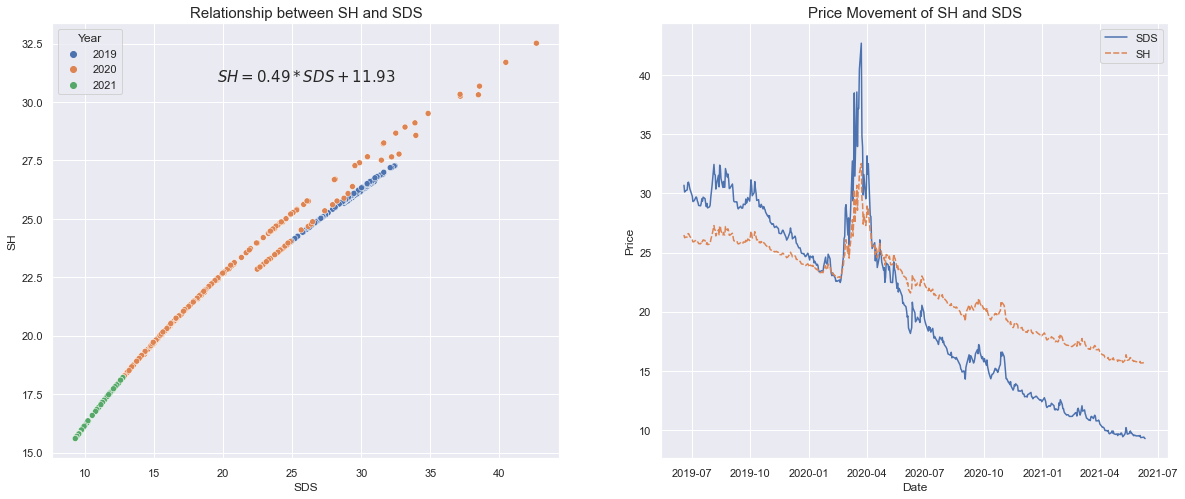

7. Relationship between SH(-1x) and UPRO(3x)


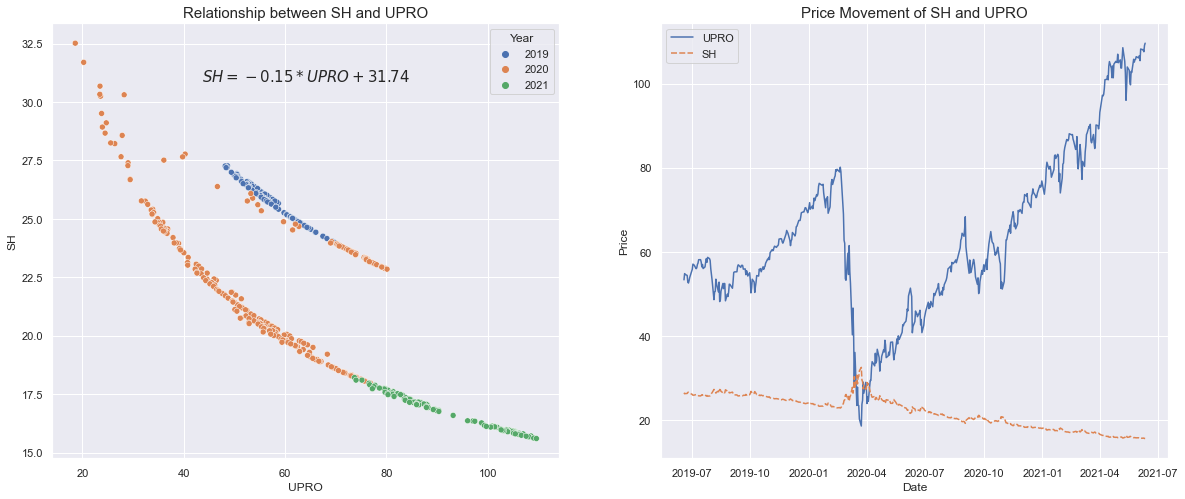

8. Relationship between SH(-1x) and SSO(2x)


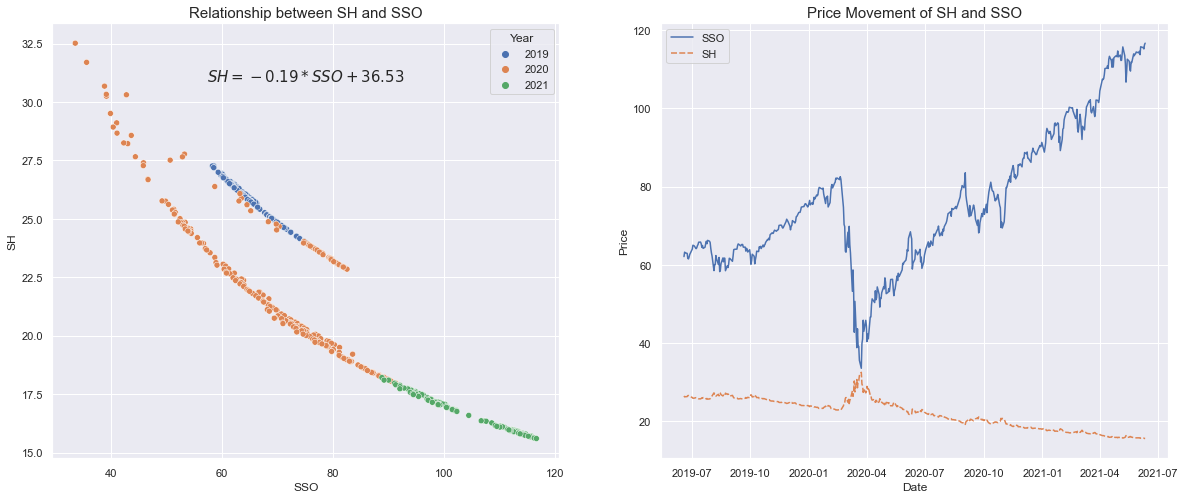

9. Relationship between SH(-1x) and SPXU(-3x)


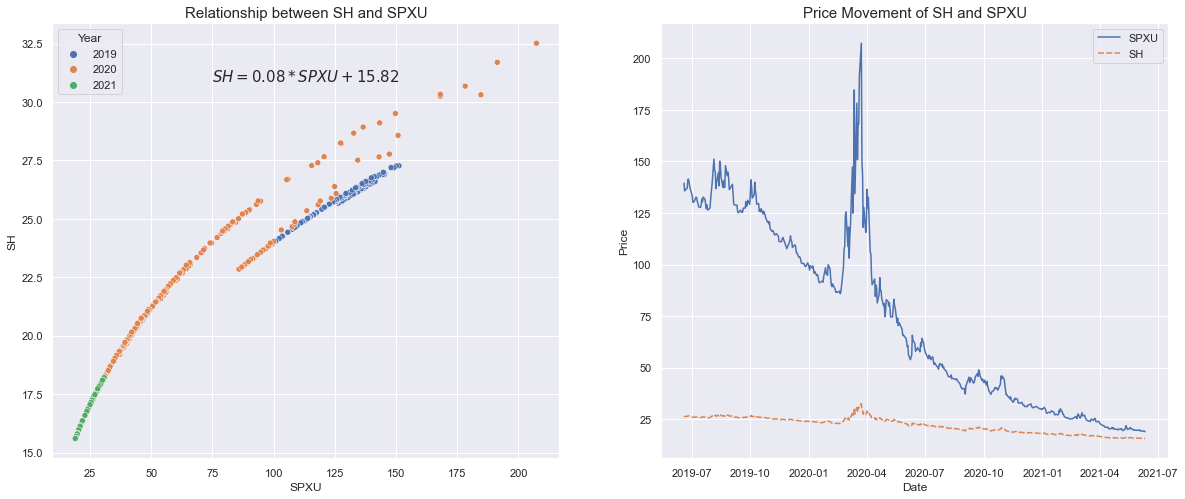

10. Relationship between SDS(-2x) and UPRO(3x)


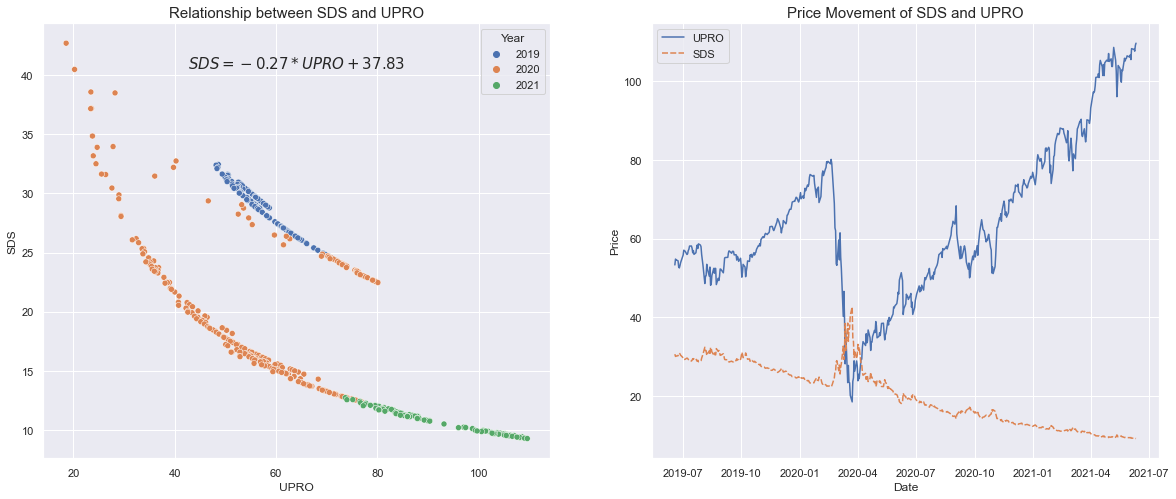

11. Relationship between SDS(-2x) and SSO(2x)


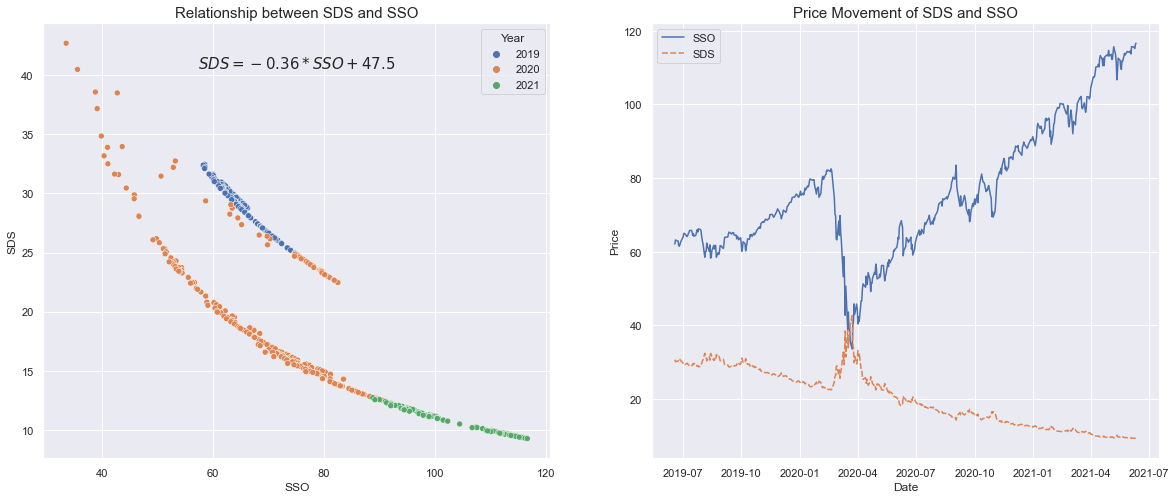

12. Relationship between SDS(-2x) and SPXU(-3x)


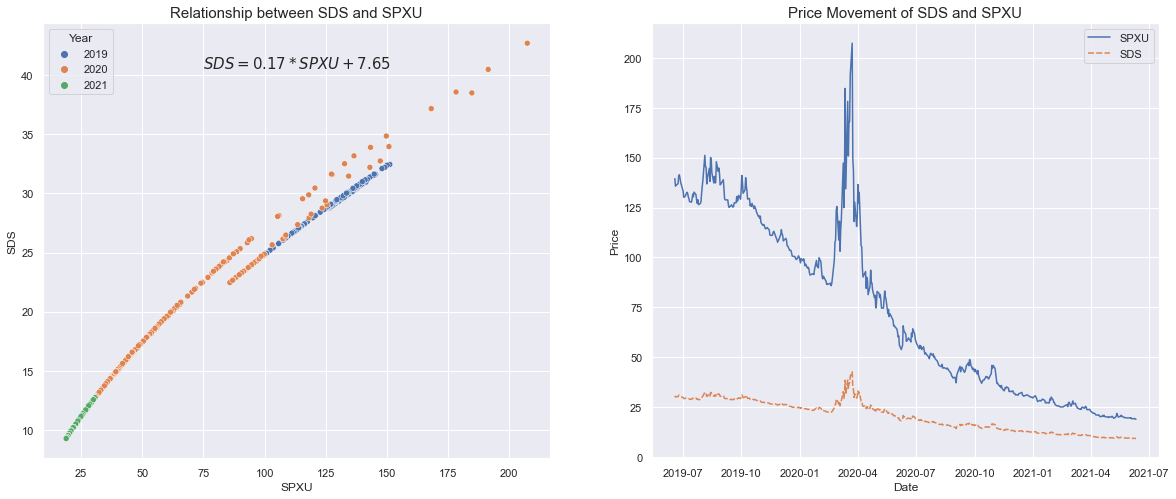

13. Relationship between UPRO(3x) and SSO(2x)


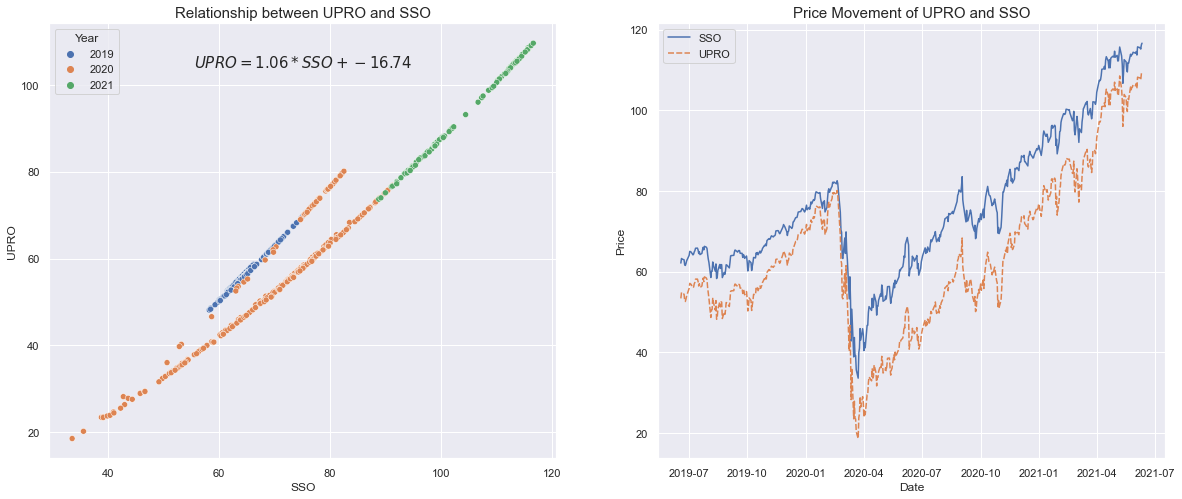

14. Relationship between UPRO(3x) and SPXU(-3x)


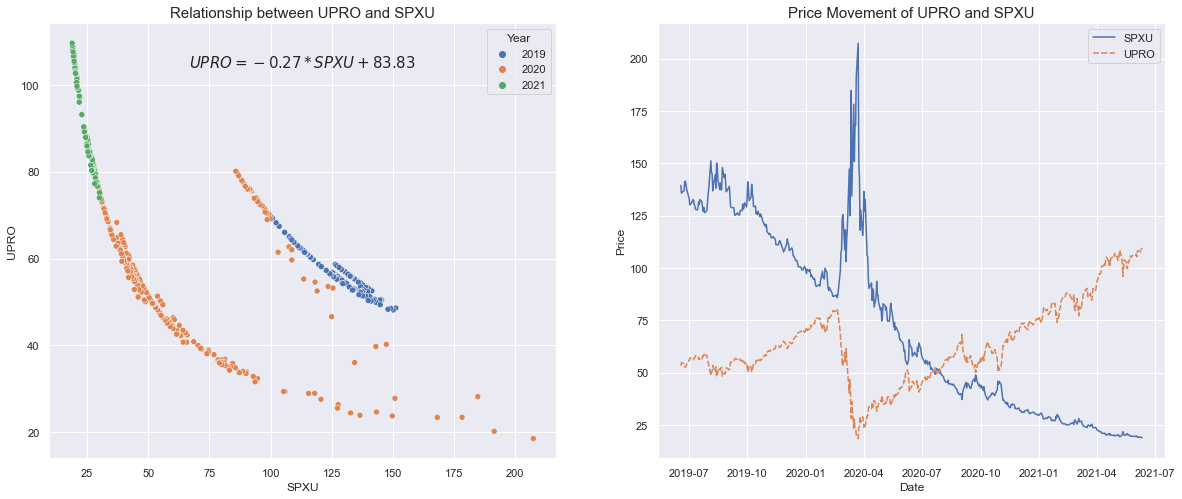

15. Relationship between SSO(2x) and SPXU(-3x)


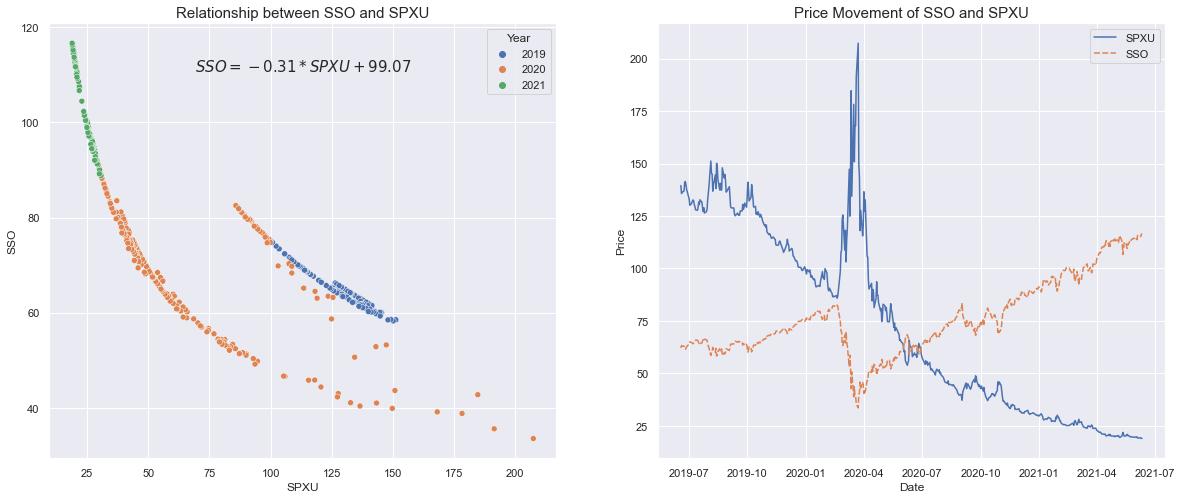

In [249]:
period = 500 # Number of samples to plot
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(TICKERS, 2)):
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant= plot(x_ticker, y_ticker, period)

### (c) Use one year data

1. Relationship between SPY(1x) and SH(-1x)


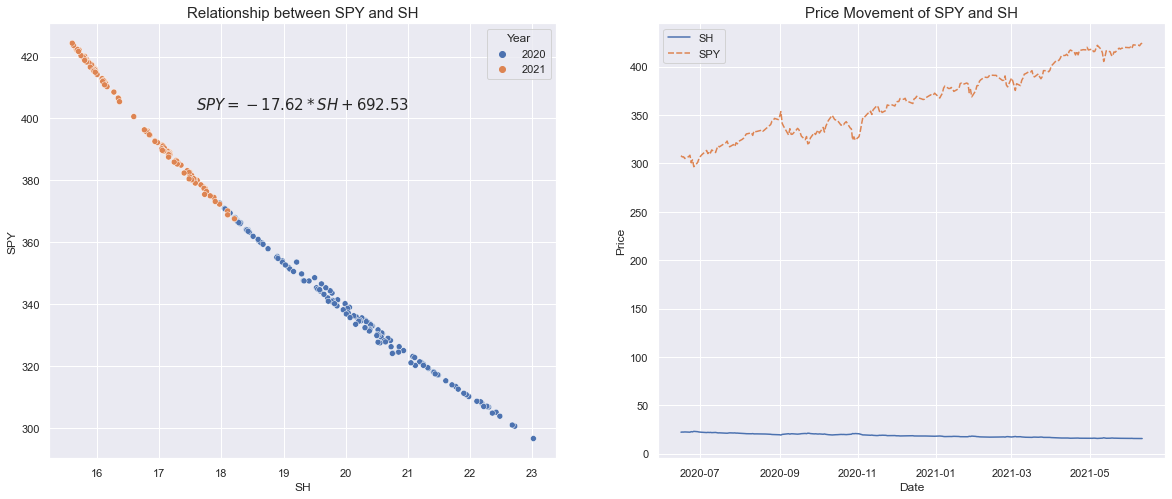

2. Relationship between SPY(1x) and SDS(-2x)


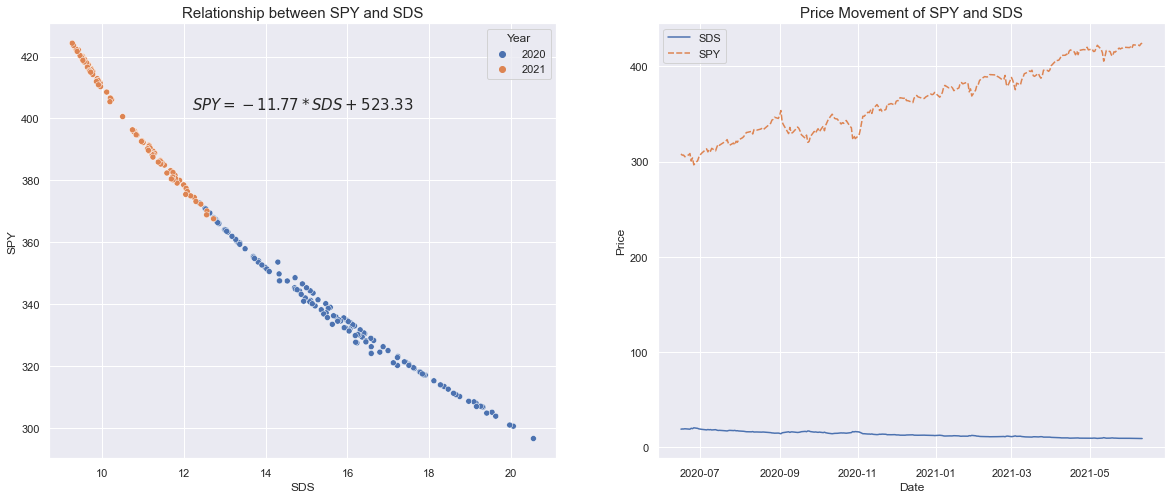

3. Relationship between SPY(1x) and UPRO(3x)


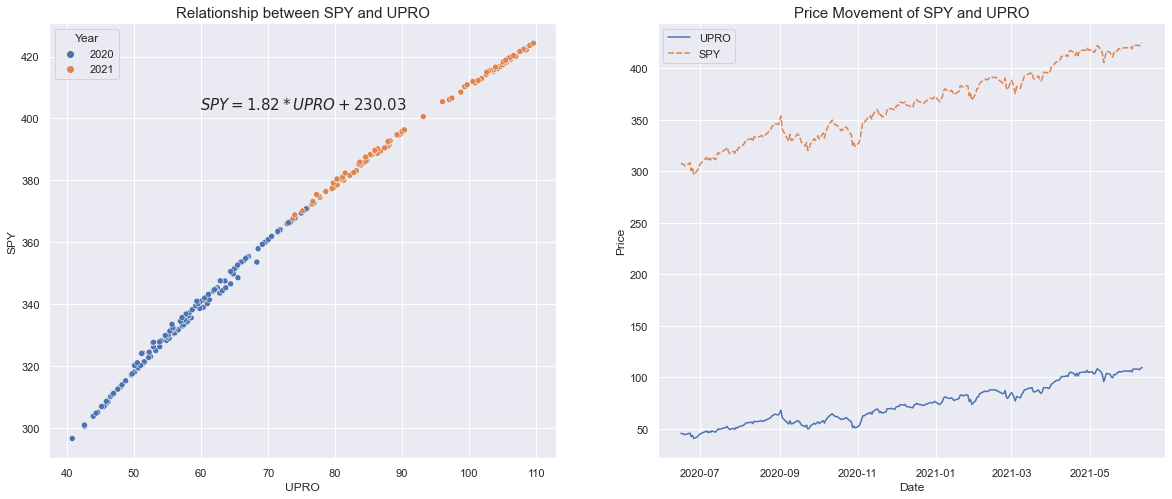

4. Relationship between SPY(1x) and SSO(2x)


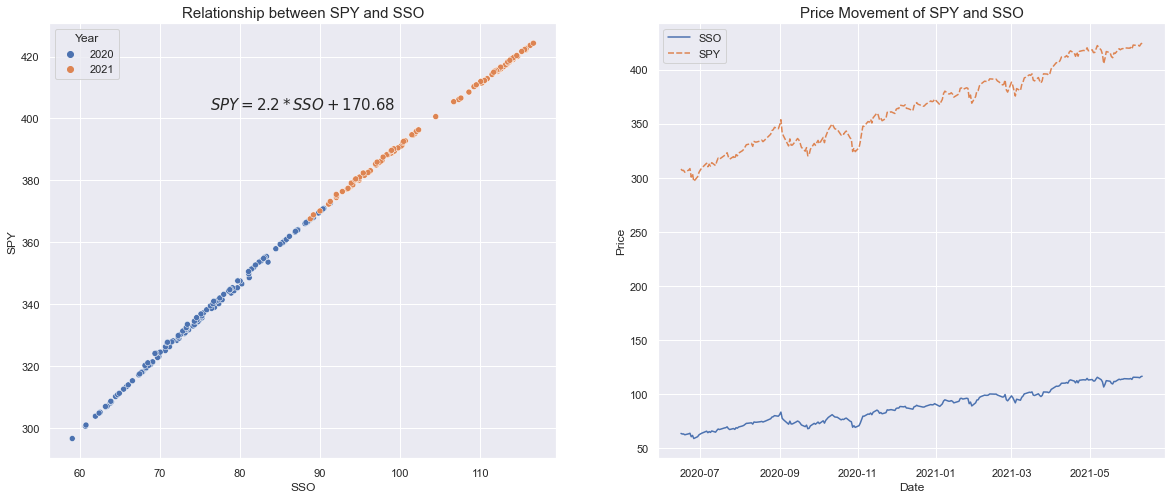

5. Relationship between SPY(1x) and SPXU(-3x)


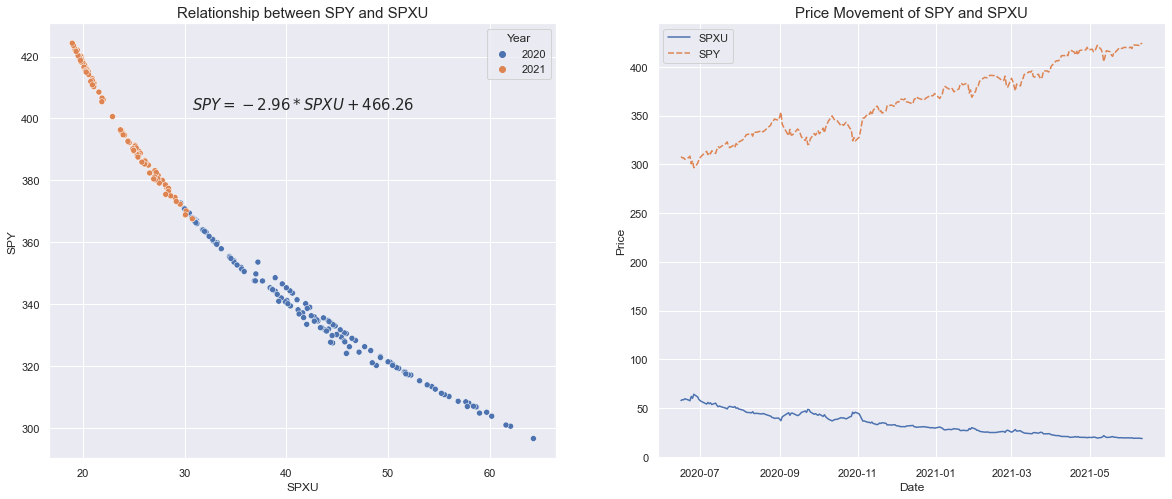

6. Relationship between SH(-1x) and SDS(-2x)


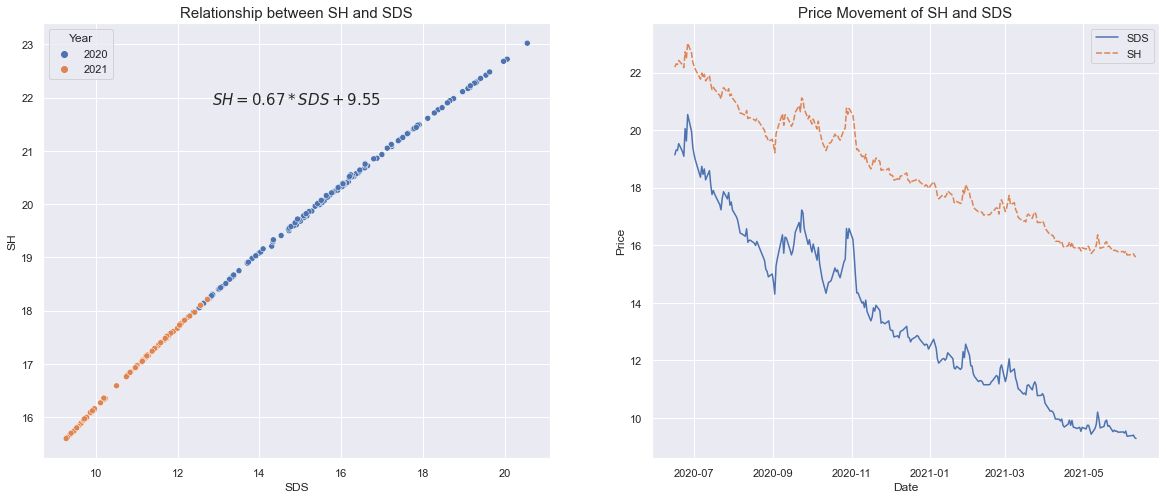

7. Relationship between SH(-1x) and UPRO(3x)


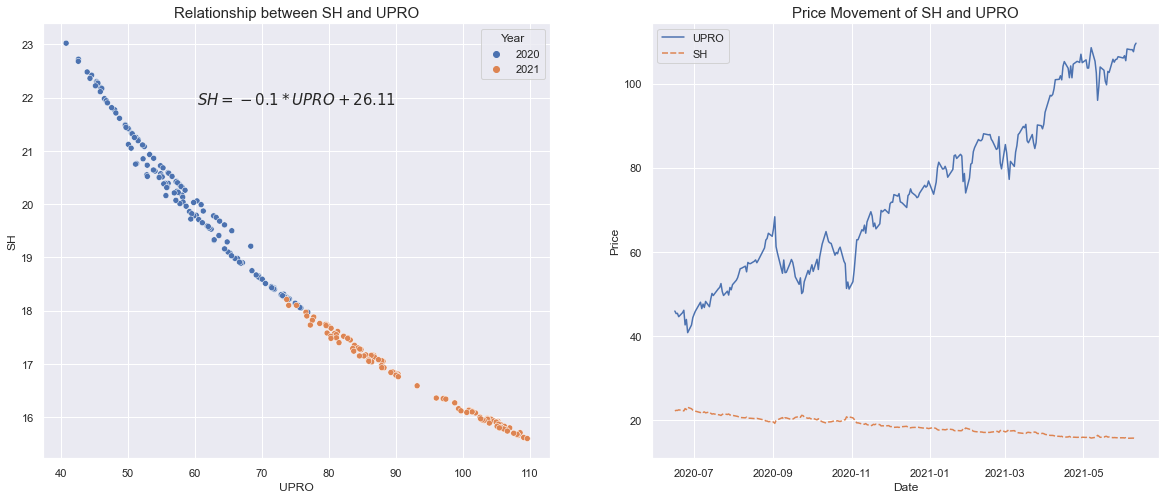

8. Relationship between SH(-1x) and SSO(2x)


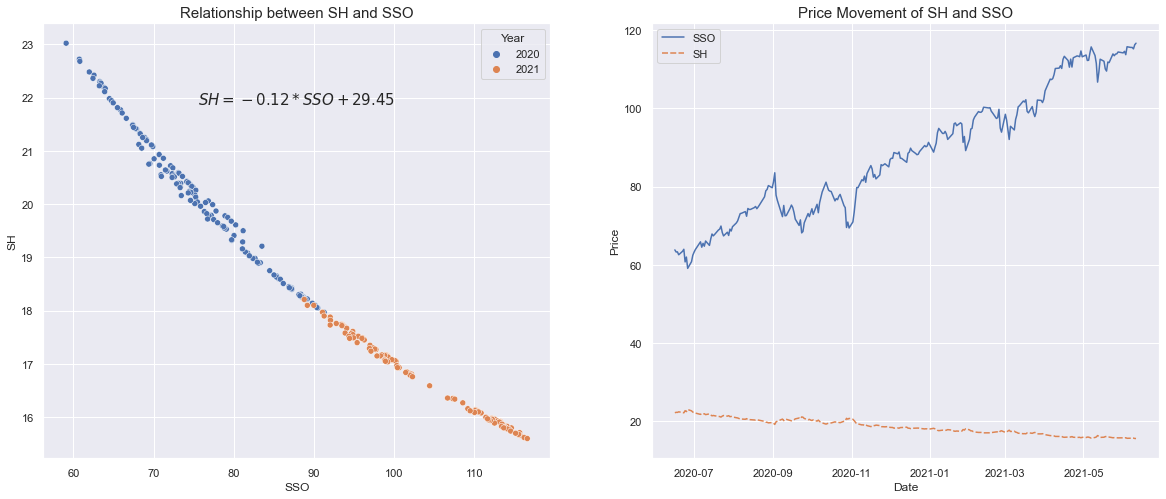

9. Relationship between SH(-1x) and SPXU(-3x)


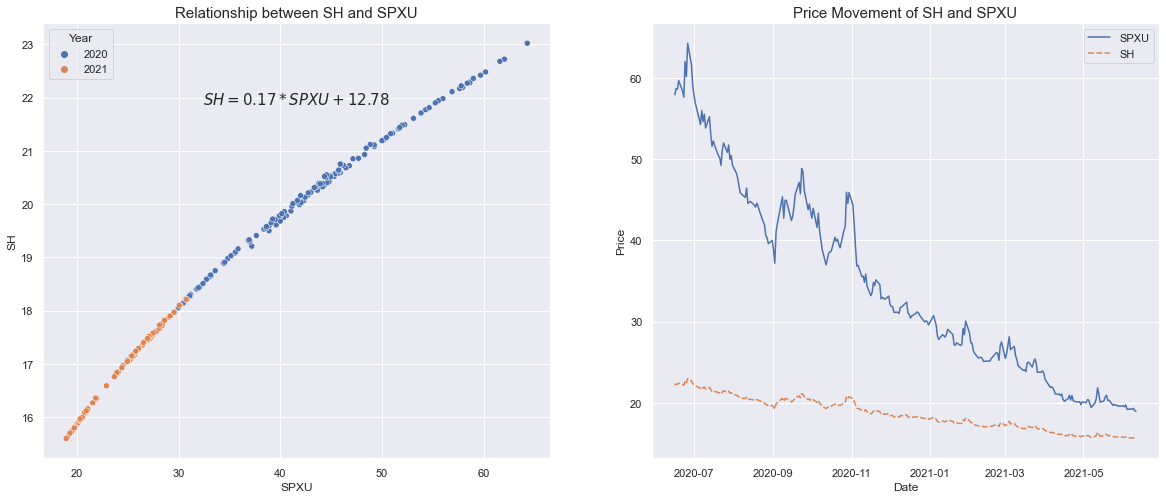

10. Relationship between SDS(-2x) and UPRO(3x)


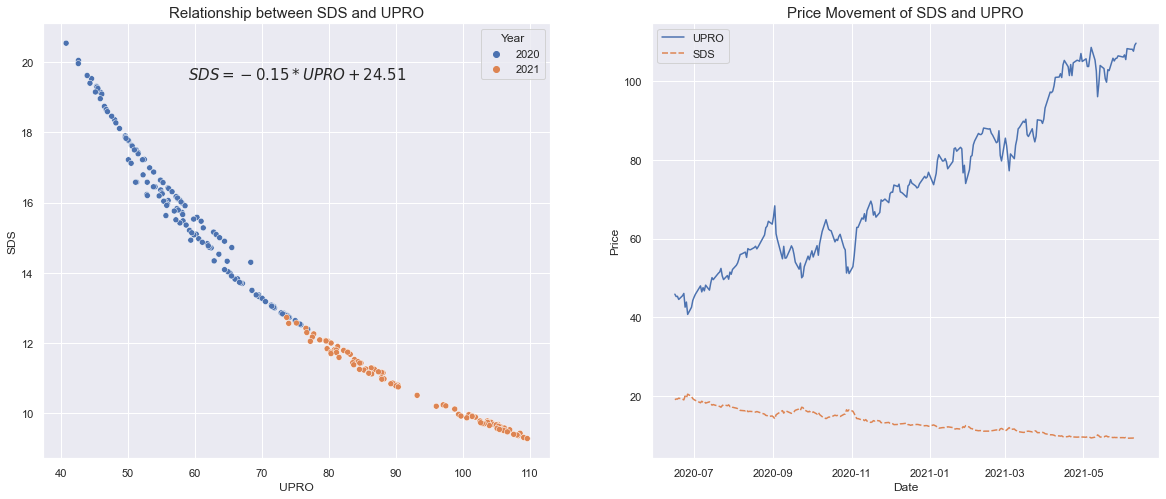

11. Relationship between SDS(-2x) and SSO(2x)


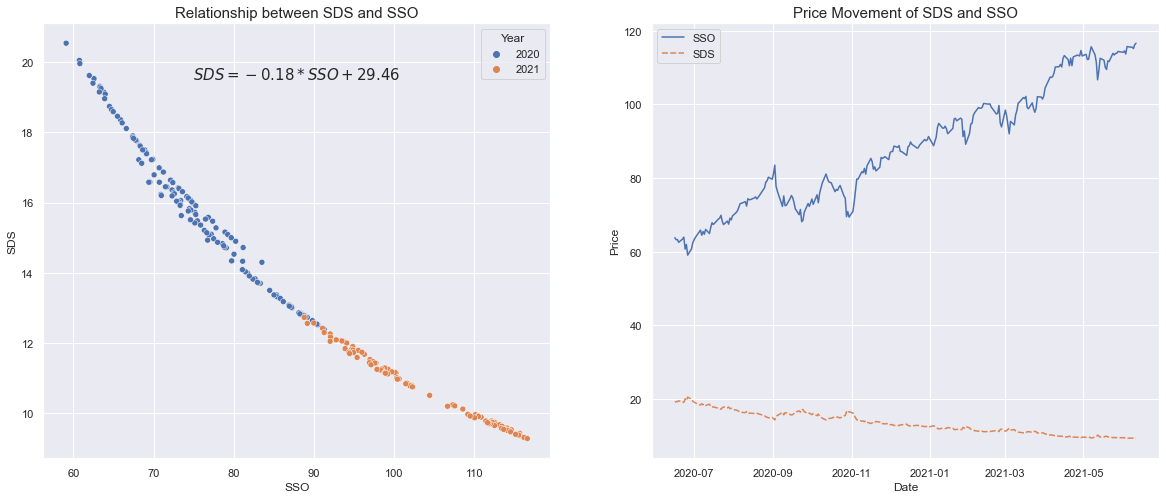

12. Relationship between SDS(-2x) and SPXU(-3x)


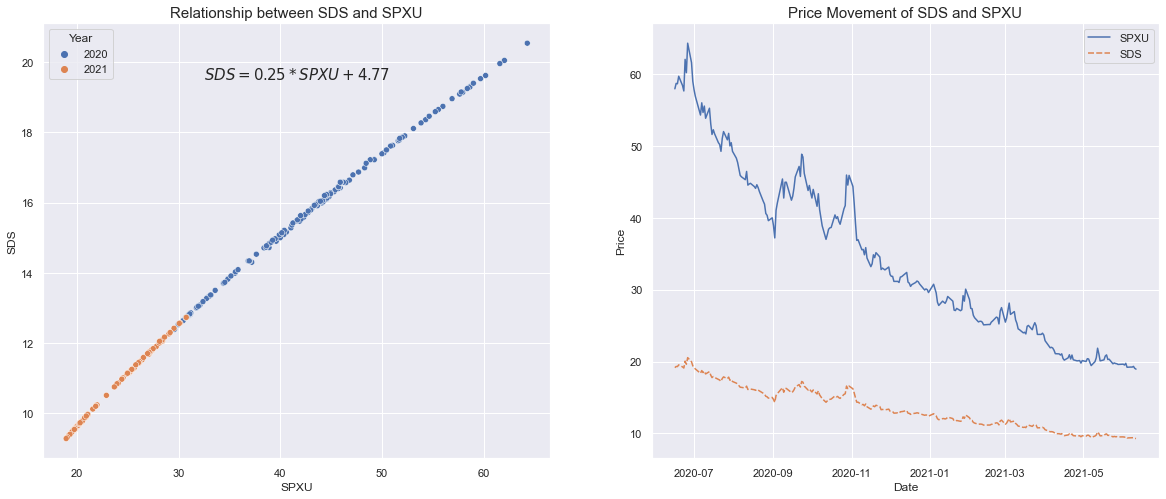

13. Relationship between UPRO(3x) and SSO(2x)


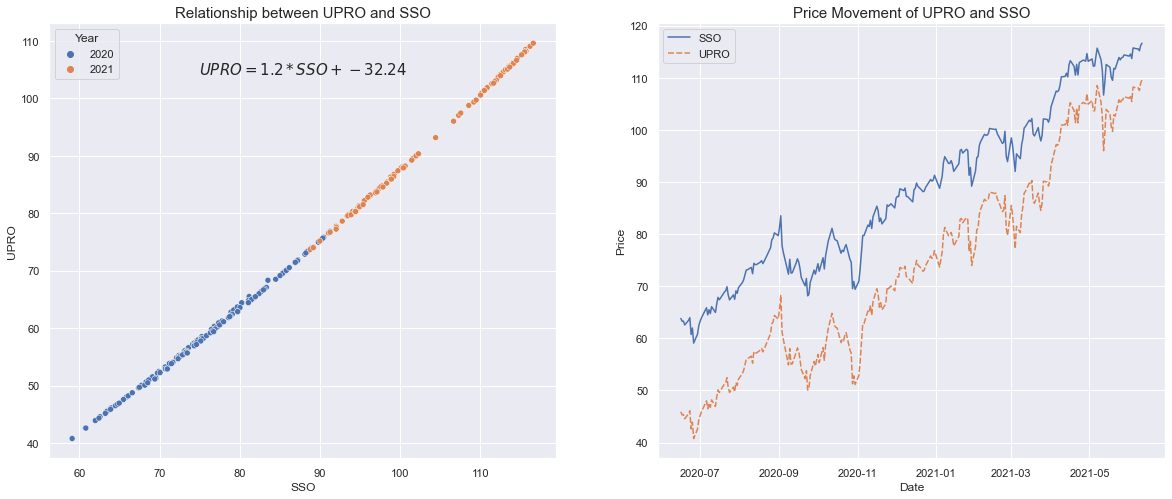

14. Relationship between UPRO(3x) and SPXU(-3x)


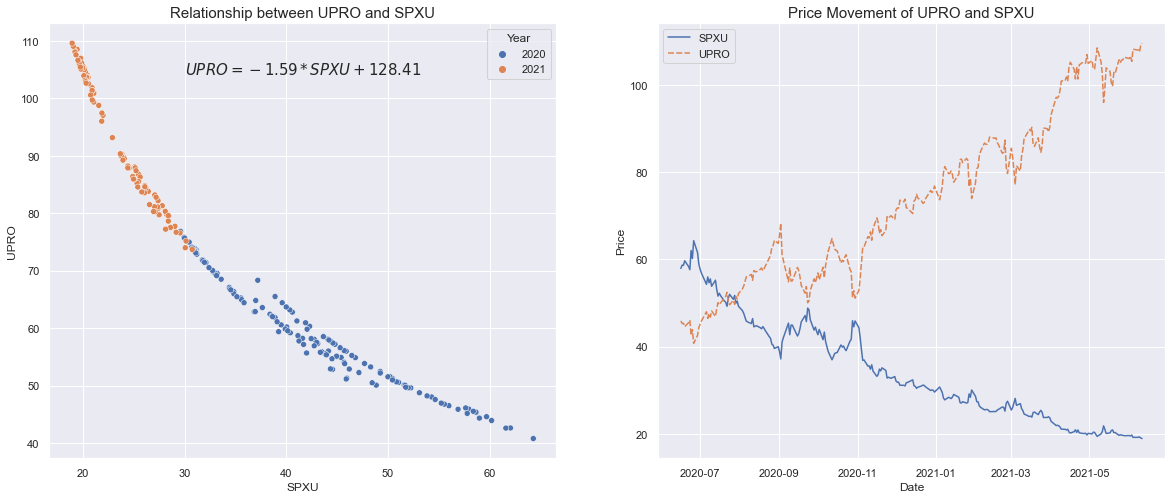

15. Relationship between SSO(2x) and SPXU(-3x)


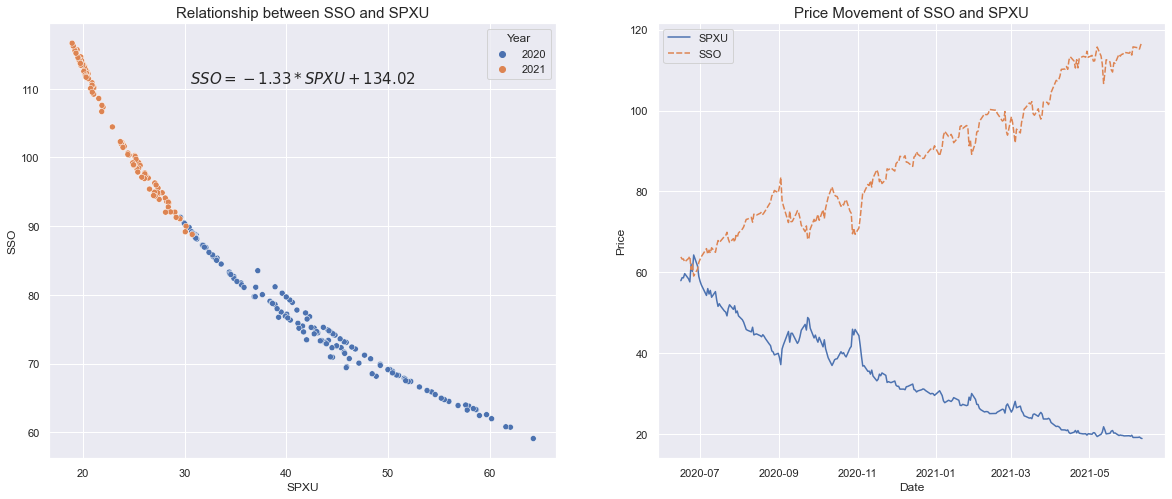

In [250]:
period = 250 # Number of samples to plot
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(TICKERS, 2)):
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant = plot(x_ticker, y_ticker, period)

### (d) Scatter plot, price movement, and residual plot between two ETFs

Relationship between SH(-1x) and SPXU(-3x)


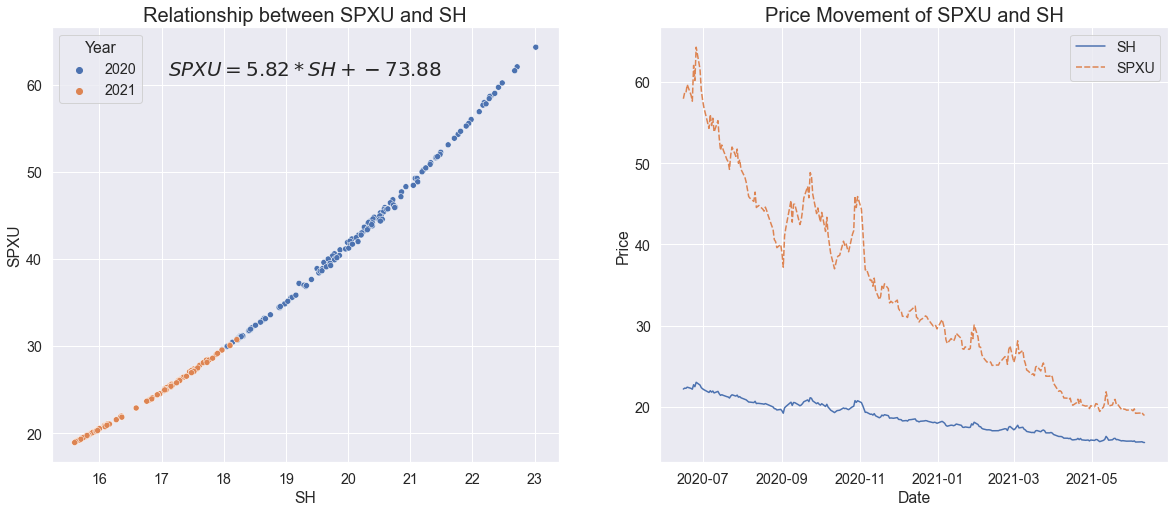

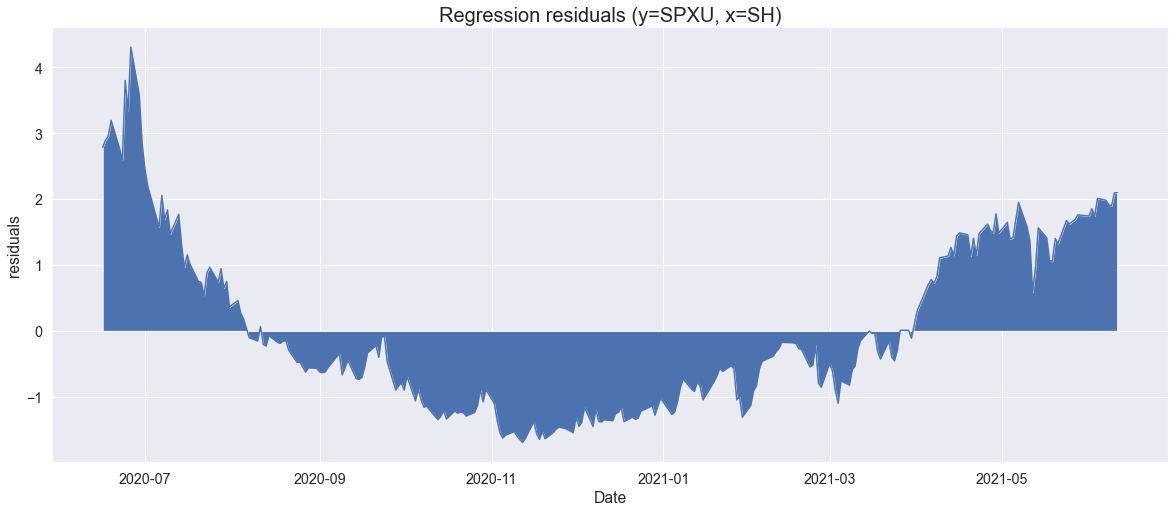

In [329]:
x_ticker, y_ticker = "SH", "SPXU"
period = 250

print("Relationship between {}({}) and {}({})".format(x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
data_pair, slope, constant = plot(y_ticker, x_ticker, period=period)
pred_y = constant + slope * data_pair[x_ticker]

data_pair["residuals"] = data_pair[y_ticker] - pred_y
plt.figure(figsize=(20,8))
plt.title("Regression residuals (y={}, x={})".format(y_ticker, x_ticker), fontsize=20)
sns.lineplot(data=data_pair["residuals"])
plt.fill_between(data_pair.index, data_pair["residuals"])
plt.show()

In [330]:
RES_NUM = 6
LOOK_BACK_WINDOW = 10
data_pair["pnl_abs"] = data_pair["residuals"].shift(-LOOK_BACK_WINDOW) - data_pair["residuals"]  # forward pnl
data_pair['residual_bucket'] = pd.cut(data_pair['residuals'], RES_NUM, labels = False)


Average 10 day pnl for 6 bucket:
residual_bucket
0    0.109290
1    0.012660
2   -0.051756
3   -0.196732
4   -0.944234
5   -2.162295
Name: pnl_abs, dtype: float64/n


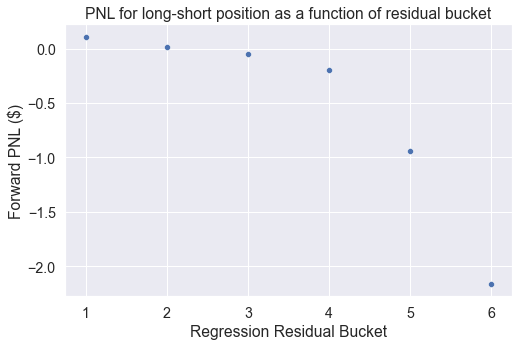

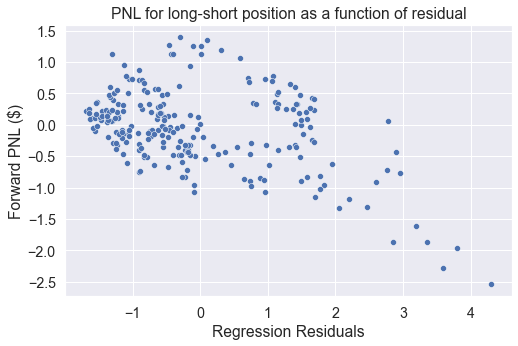

In [331]:
# residual_bucket vs avg_pnl
mapping = data_pair.groupby(["residual_bucket"])["pnl_abs"].mean()
print("Average {} day pnl for {} bucket:".format(LOOK_BACK_WINDOW, RES_NUM))
print("{}/n".format(mapping))
data_pair = data_pair.assign(avg_pnl = data_pair.residual_bucket.map(mapping))

sns.scatterplot(x = np.arange(RES_NUM) + 1, y = mapping)
# plt.scatter(df.residual_bucket,df.avg_pnl)
plt.xlabel("Regression Residual Bucket")
plt.ylabel("Forward PNL ($)")
plt.title("PNL for long-short position as a function of residual bucket")
plt.show()

sns.scatterplot(x = data_pair["residuals"], y = data_pair["pnl_abs"])
plt.xlabel("Regression Residuals")
plt.ylabel("Forward PNL ($)")
plt.title("PNL for long-short position as a function of residual")
plt.show()

## 2. Data Exploration - intraday level 1 data version

In [20]:
filepath = [file for file in os.listdir("cleaned_csv") if file.endswith("_new.csv") and file.startswith("07")]
all_data = []

for path in filepath:
    df_temp = pd.read_csv(os.path.join("cleaned_csv", path))
    if not len(all_data):
        all_data = df_temp
    else:
        all_data = pd.concat([all_data, df_temp])
all_data.time=pd.to_datetime(all_data.time)
all_data = all_data.reset_index(drop=True)

In [212]:
def plot_multiple(df, i, j, period=None):
    """ 
    Usage: To do a linear regression of y=SPY on x=SH, call `plot("SPY", "SH")`
    This function plots two graph about the relationship between two tickers, and do OLS with them.
        plot 1: The scatter plot of two etf prices
        plot 2: The lineplot of two etf prices over time
    Arguments:
        y_ticker: ticker of the etf to be the dependent variable
        x_ticker: ticker of the etf to be the independent variable
        period (day): If given, use the last `period` number of closed price 
                    If not given, use all the data since both tickers are traded
    """

    x_ticker, y_ticker = TICKERS[i], TICKERS[j]
    data_pair = pd.DataFrame()
    data_pair["{}_bid".format(x_ticker)], data_pair["{}_bid".format(y_ticker)] = \
        df["bid{}".format(i + 1)], df["bid{}".format(j + 1)]
    data_pair["{}_ask".format(x_ticker)], data_pair["{}_ask".format(y_ticker)] = \
        df["ask{}".format(i + 1)], df["ask{}".format(j + 1)]
    data_pair["{}_mid".format(x_ticker)], data_pair["{}_mid".format(y_ticker)] = \
        df["mid{}".format(i + 1)], df["mid{}".format(j + 1)]
    data_pair["{}_imb".format(x_ticker)], data_pair["{}_imb".format(y_ticker)] = \
        df["imb{}".format(i + 1)], df["imb{}".format(j + 1)]
    
    x_mid, y_mid = data_pair["{}_mid".format(x_ticker)], data_pair["{}_mid".format(y_ticker)]
    x, y = x_mid, y_mid
    
    data_pair["time"] = df.time
#     data_pair["date_hour"] = list(map(lambda x: x.strftime("%m%d-%H"), df.time))
    data_pair["date"] = list(map(lambda x: x.strftime("%m%d"), df.time))
    data_pair["hour"] = list(map(lambda x: x.strftime("%H"), df.time))
    data_pair["date_hour"] = data_pair["date"] + '-' + data_pair["hour"]
    
    # check whether it is :00~:29 or :30~:59
    first_second_half = list(map(lambda x: "30-59" if int(x.strftime("%M")) // 30 else "0-29", df.time))
    data_pair["half_hour"] = data_pair["hour"] + ':' + first_second_half
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Relationship between {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.scatterplot(data=data_pair, x="{}_mid".format(x_ticker), y="{}_mid".format(y_ticker), hue="date", palette="Greens")
    
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()
    constant = result.params[0]
    slope = result.params[1]
    
    data_pair["pred_y"] = slope * x_mid + constant
    
    plt.text((max(x_mid) + min(x_mid)) / 2, 
             max(y_mid), r'${}={}*{} + {}$'.format(y_ticker, round(slope, 2), x_ticker, round(constant, 2)), fontsize=20, ha='center')
    plt.plot(x_mid, slope * x_mid + constant, linestyle='-', c="red")

    plt.subplot(1,2,2)
    plt.title("Price Movement of {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.lineplot(data=data_pair[["{}_mid".format(x_ticker), "{}_mid".format(y_ticker)]])
    plt.ylabel("Price")
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("{}_bid vs {}_ask".format(x_ticker, y_ticker), fontsize=20)
    sns.scatterplot(data=data_pair, x="{}_bid".format(x_ticker), y="{}_ask".format(y_ticker), hue="date", palette="Greens")
    
    plt.subplot(1,2,2)
    plt.title("{}_ask vs {}_bid".format(x_ticker, y_ticker), fontsize=20)
    sns.scatterplot(data=data_pair, x="{}_ask".format(x_ticker), y="{}_bid".format(y_ticker), hue="date", palette="Greens")
    plt.show()
    
    return data_pair, slope, constant

In [130]:
# data_pair, slope, constant = plot_multiple(all_data, 0, 1, period=None)

#### Theoretical Slope formula
Let  
ETF X: leverage m of SPY, price p_x  
ETF Y: leverage n of SPY, price p_y  
 
$$ n * \frac{\Delta p_x}{p_x} = m * \frac{\Delta p_y}{p_y} $$ 
$$ => {\Delta p_y} = \frac{n}{m} * \frac{p_y}{p_x} * \Delta p_x $$
Hence, $$ theoretical\_slope = \frac{n}{m} * \frac{p_y}{p_x} $$

In [24]:
def get_theoretical_slope(df, i, j):
    x_ticker, y_ticker = TICKERS[x_idx], TICKERS[y_idx]
    x, y = df["mid{}".format(i + 1)], df["mid{}".format(j + 1)]
    
    p_yticker_avg, p_xticker_avg = np.mean(y), np.mean(x)
    x_leverage, y_leverage = int(LEVERAGES[x_ticker][:-1]), int(LEVERAGES[y_ticker][:-1])
    
    return (p_yticker_avg / p_xticker_avg) * (y_leverage / x_leverage)
    

### (a) Plot the relationship between each pair of ETFs

1. Relationship between SPY(1x) and SH(-1x)
Theoretical slope: -0.0352


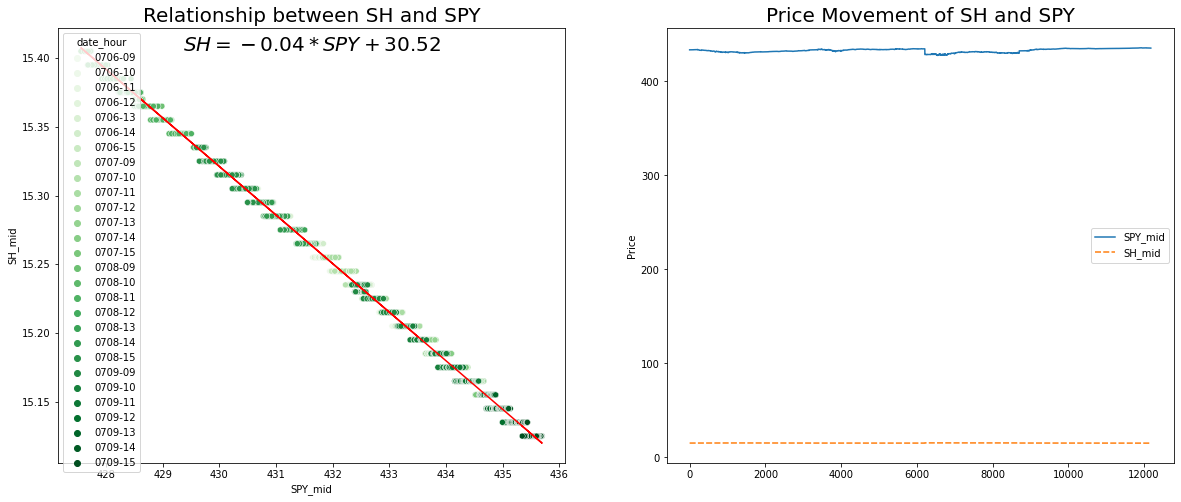

2. Relationship between SPY(1x) and SDS(-2x)
Theoretical slope: -0.0409


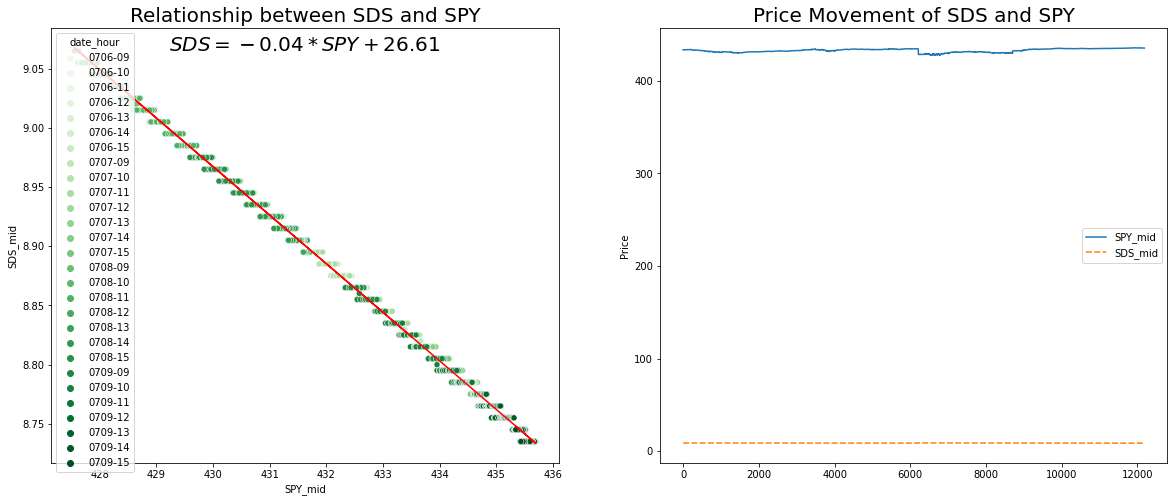

3. Relationship between SPY(1x) and UPRO(3x)
Theoretical slope: 0.8116


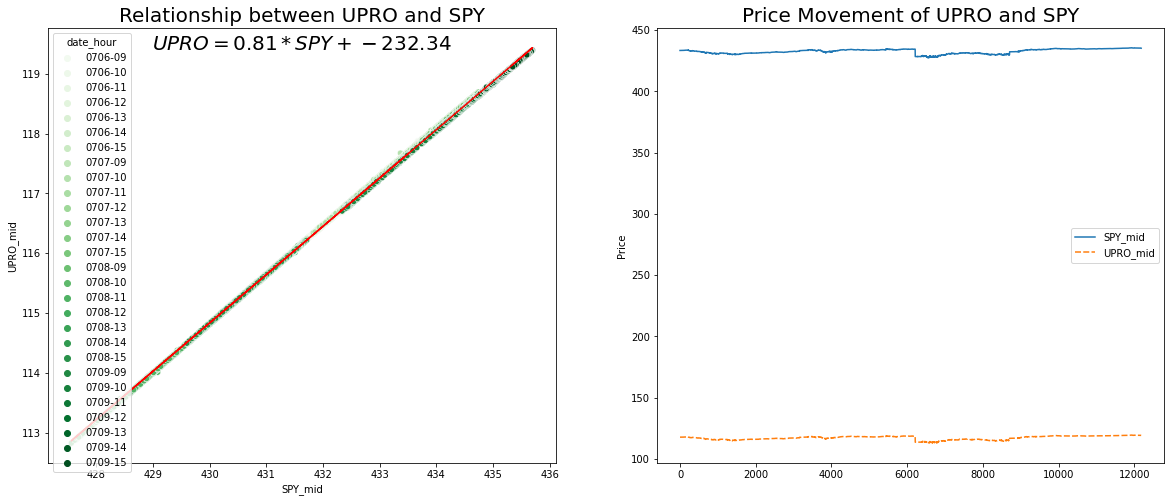

4. Relationship between SPY(1x) and SSO(2x)
Theoretical slope: 0.5633


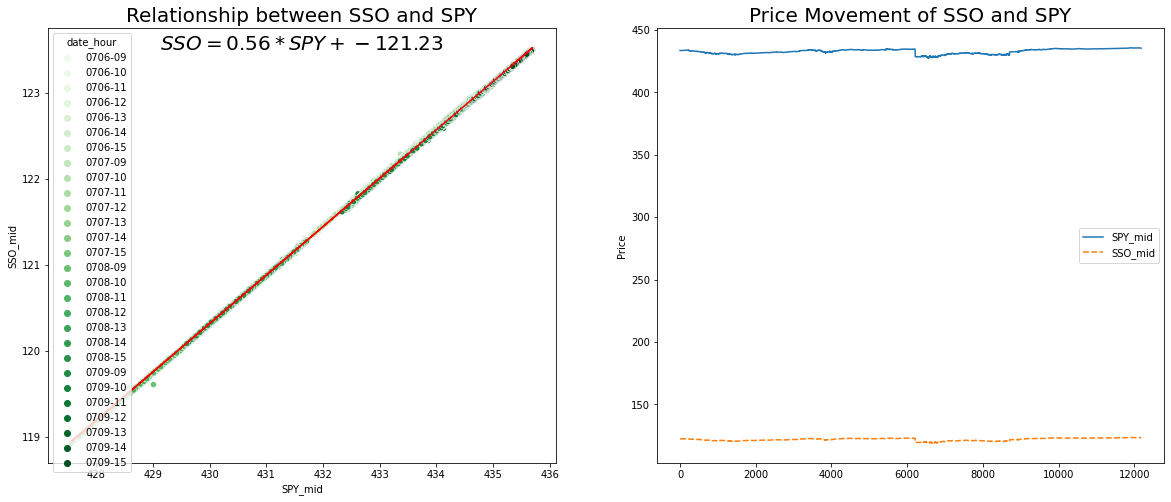

5. Relationship between SPY(1x) and SPXU(-3x)
Theoretical slope: -0.1221


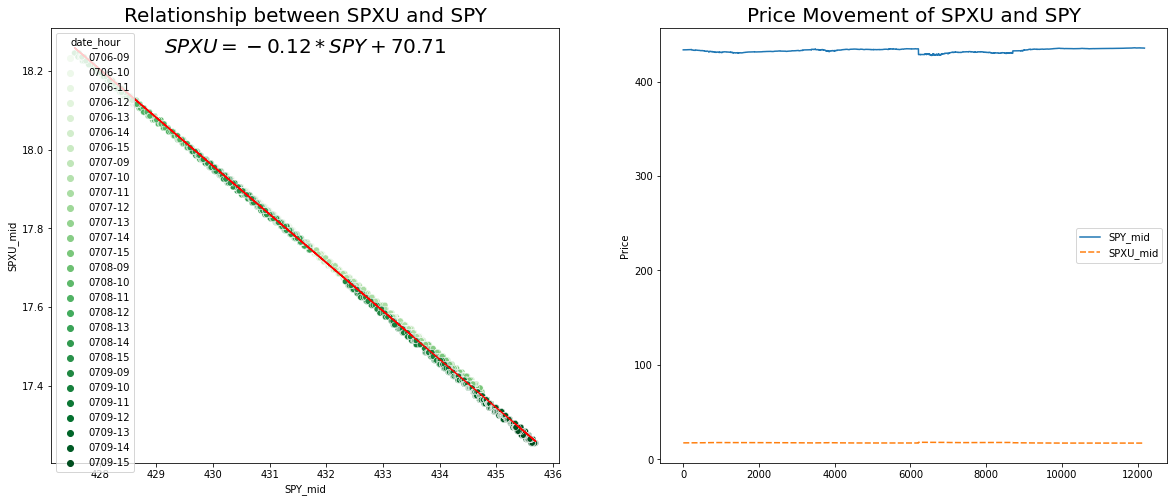

6. Relationship between SH(-1x) and SDS(-2x)
Theoretical slope: 1.1631


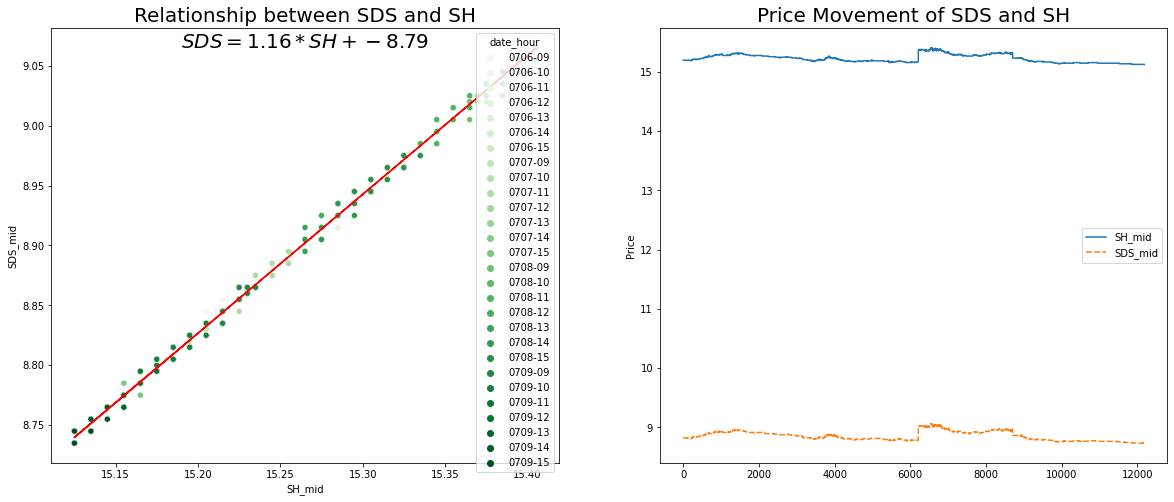

7. Relationship between SH(-1x) and UPRO(3x)
Theoretical slope: -23.0745


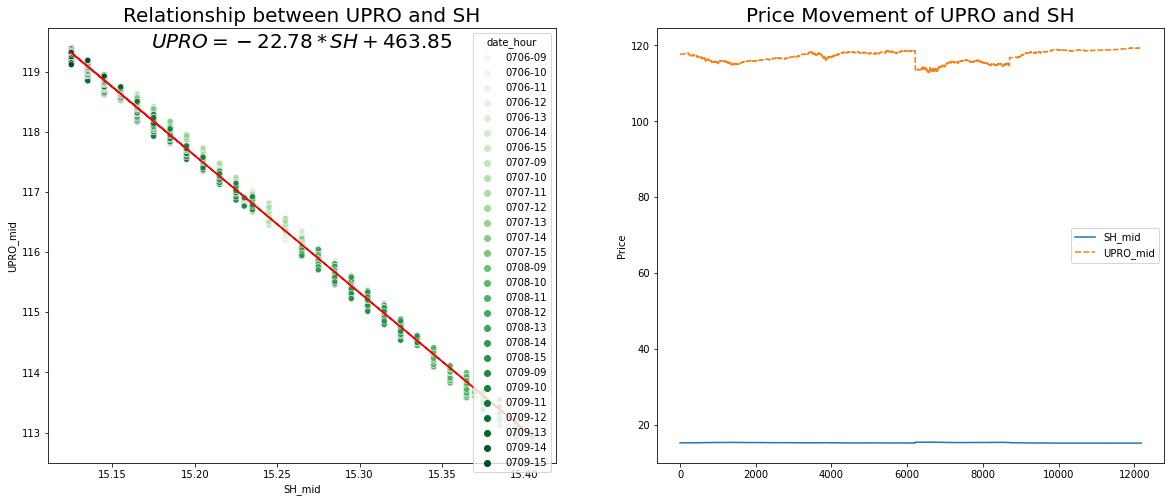

8. Relationship between SH(-1x) and SSO(2x)
Theoretical slope: -16.0136


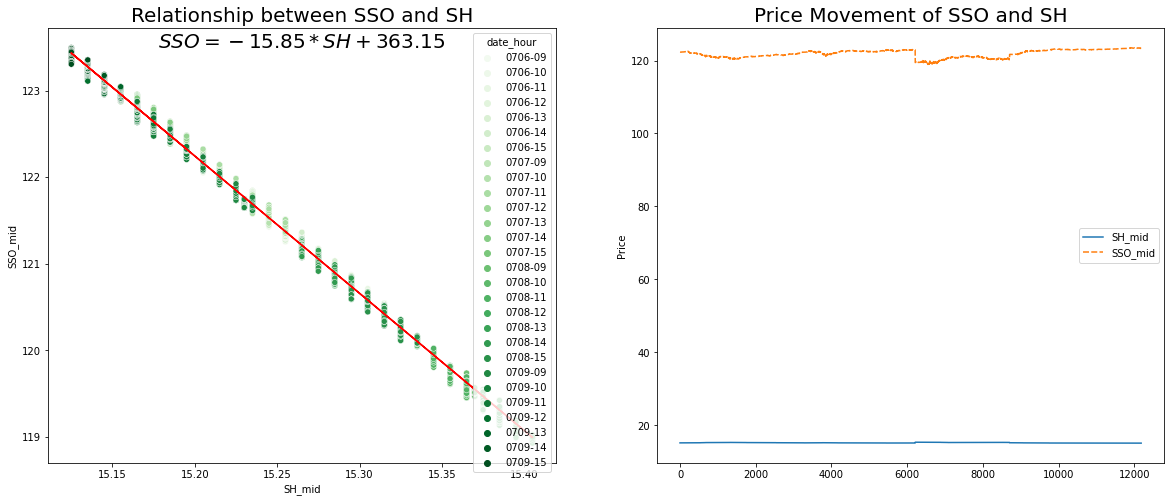

9. Relationship between SH(-1x) and SPXU(-3x)
Theoretical slope: 3.4718


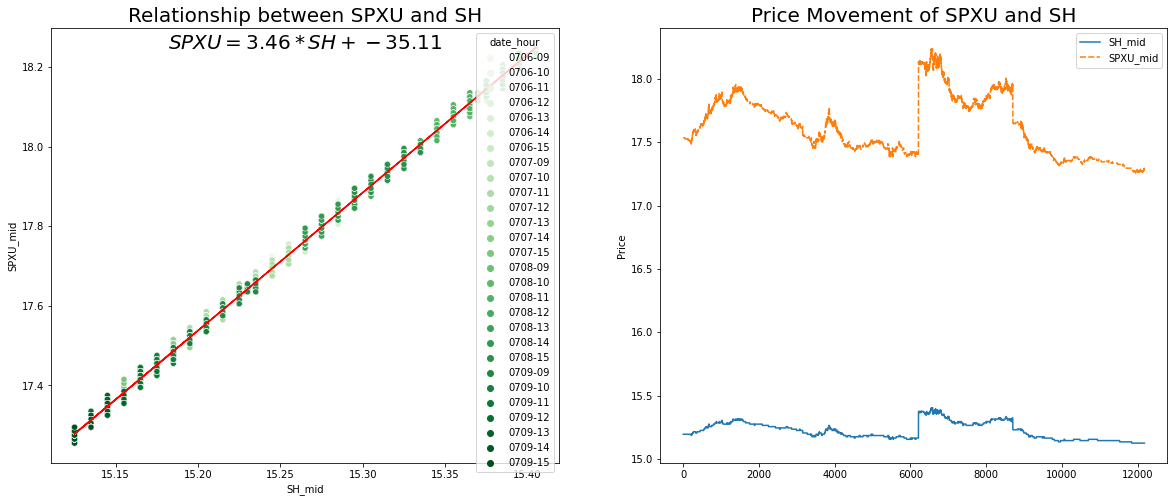

10. Relationship between SDS(-2x) and UPRO(3x)
Theoretical slope: -19.8381


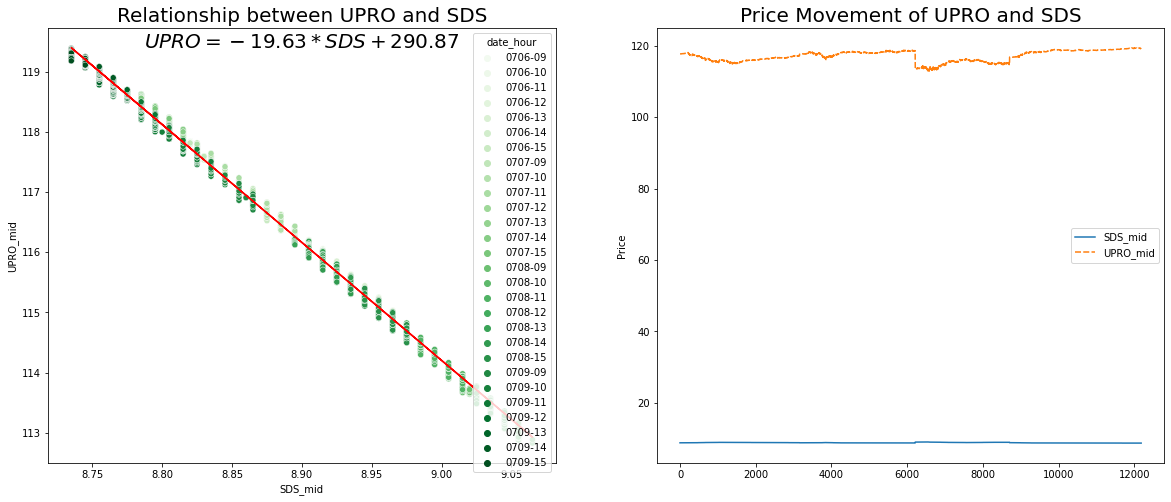

11. Relationship between SDS(-2x) and SSO(2x)
Theoretical slope: -13.7676


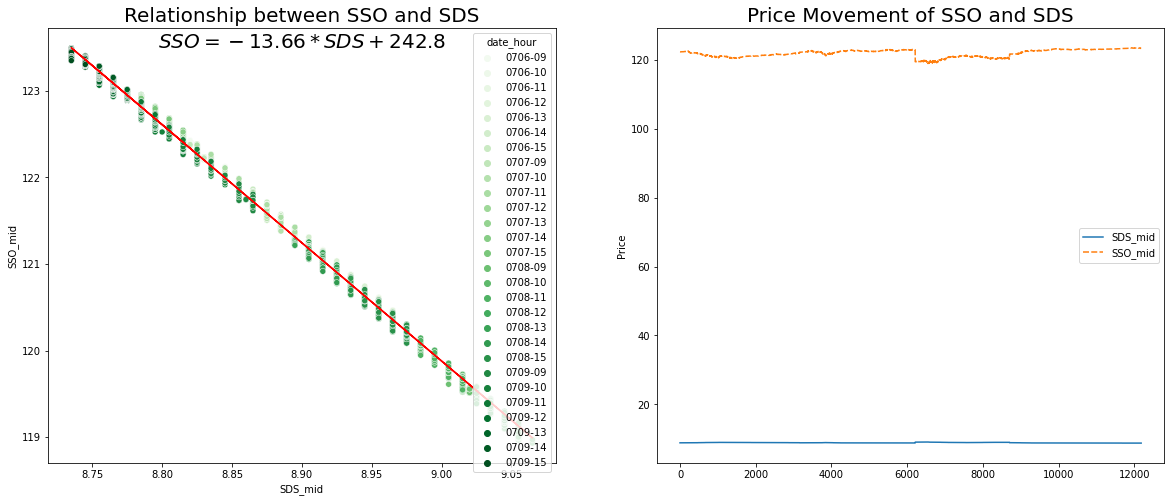

12. Relationship between SDS(-2x) and SPXU(-3x)
Theoretical slope: 2.9848


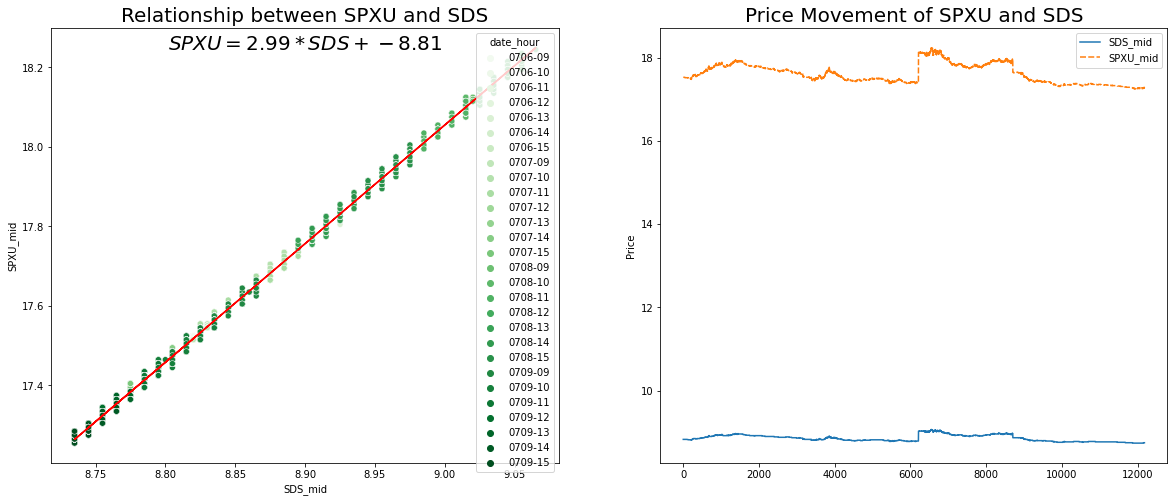

13. Relationship between UPRO(3x) and SSO(2x)
Theoretical slope: 0.694


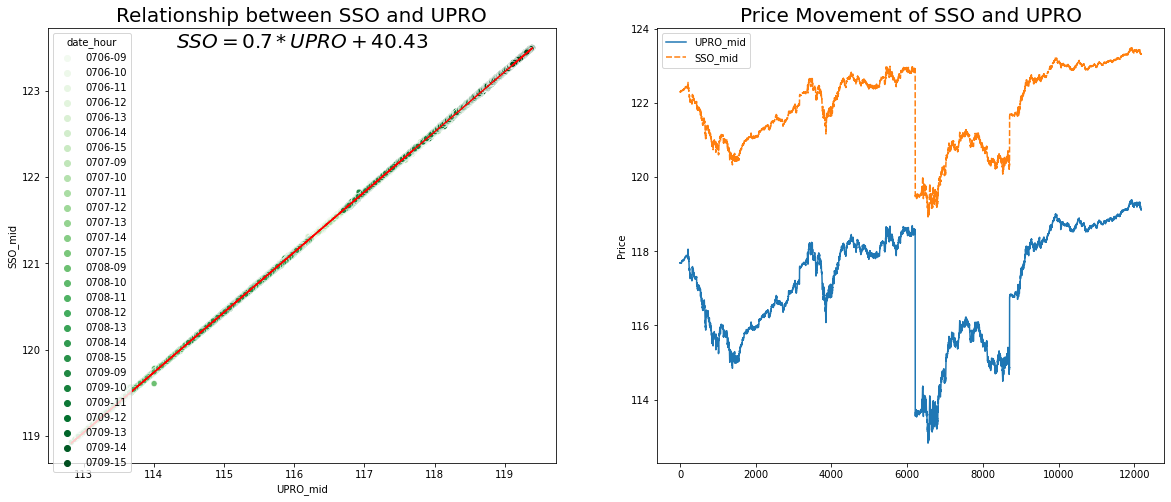

14. Relationship between UPRO(3x) and SPXU(-3x)
Theoretical slope: -0.1505


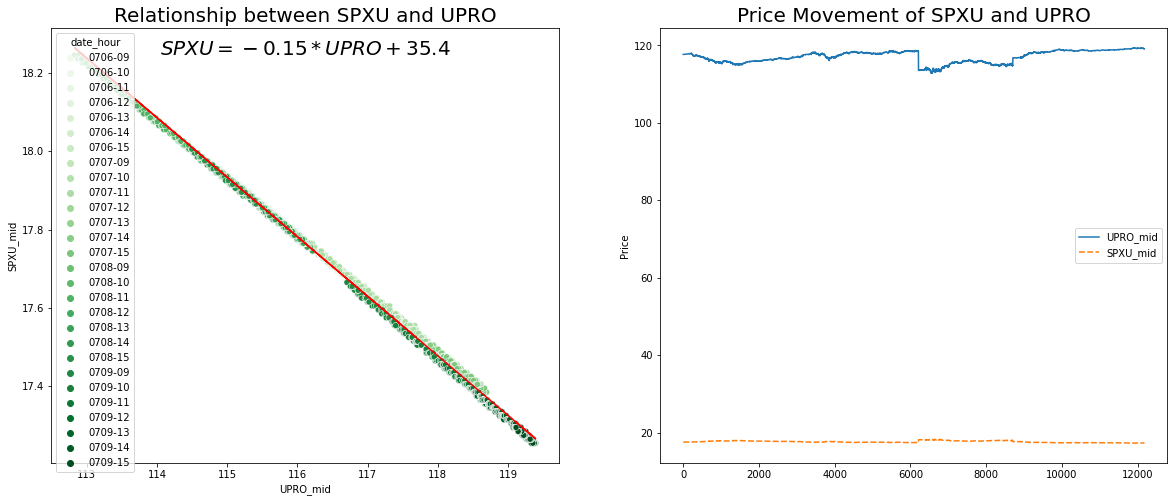

15. Relationship between SSO(2x) and SPXU(-3x)
Theoretical slope: -0.2168


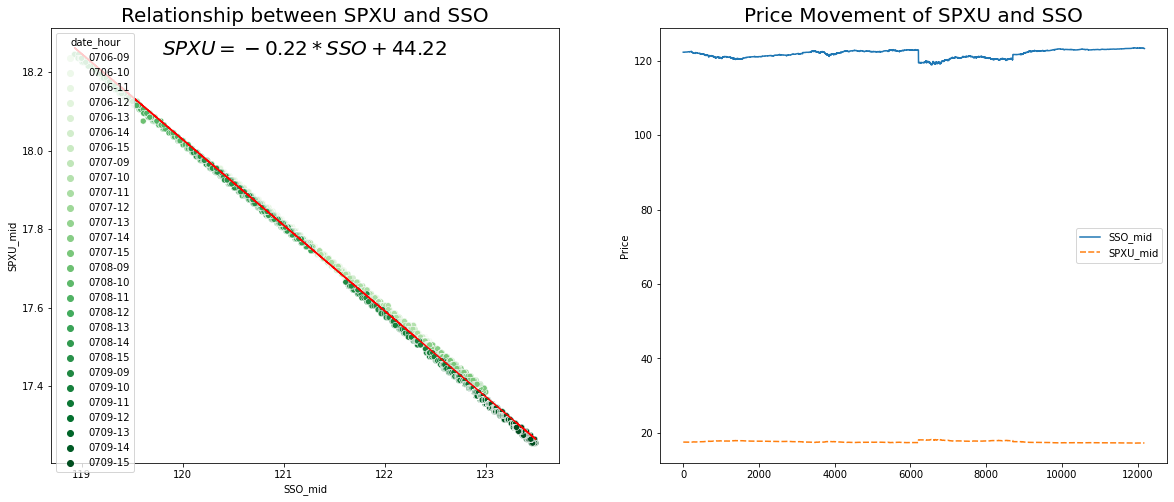

In [38]:
for i, (x_idx, y_idx) in enumerate(itertools.combinations(range(6), 2)):
    x_ticker, y_ticker = TICKERS[x_idx], TICKERS[y_idx]
    slope_theta = get_theoretical_slope(all_data, x_idx, y_idx)
    
    print("{}. Relationship between {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    print("Theoretical slope: {}".format(round(slope_theta, 4)))
    data_pair, slope, constant = plot_multiple(all_data, x_idx, y_idx, period=None)
    

### (b) Scatter plot and Residual plot between pairs of ETFs

In [39]:
# ["SPY", "SH", "SDS", "UPRO", "SSO", "SPXU"]
LARGE_CAP = ["SPY", "UPRO", "SSO"]  # price > 100; all long side
SMALL_CAP = ["SH", "SDS", "SPXU"]   # price < 100; all short side

In [123]:
def partition_residual(df, lookback_window=10, num_bucket=6):
    print("PnL vs Regression Residuals")
    
    df['residual_bucket'] = pd.cut(df['residuals'], num_bucket, labels = False)
    # residual_bucket vs avg_pnl
    mapping = df.groupby(["residual_bucket"])["pnl_abs"].mean()
    print("Average {} seconds pnl for {} bucket:".format(lookback_window, num_bucket))
    print("{}/n".format(mapping))
    df = df.assign(avg_pnl = df.residual_bucket.map(mapping))
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.title("PNL for long-short position as a function of residual bucket", fontsize=16)
    sns.scatterplot(x = np.arange(num_bucket) + 1, y = mapping)
    # plt.scatter(df.residual_bucket,df.avg_pnl)
    plt.xlabel("Regression Residual Bucket")
    plt.ylabel("Forward PNL ($)")
    
    plt.subplot(1,2,2)
    plt.title("PNL for long-short position as a function of residual", fontsize=16)
    sns.scatterplot(x = df["residuals"], y = df["pnl_abs"])
    plt.xlabel("Regression Residuals")
    plt.ylabel("Forward PNL ($)")
    plt.show()
    
    return df

In [124]:
def arbitrary_bound(df, x_ticker, y_ticker, slope, constant, lookback_window):
    x_bid, x_ask = df["{}_bid".format(x_ticker)], df["{}_ask".format(x_ticker)]
    y_bid, y_ask = df["{}_bid".format(y_ticker)], df["{}_ask".format(y_ticker)]
    x_mid, y_mid = df["{}_mid".format(x_ticker)], df["{}_mid".format(y_ticker)]
    
    x_spread, y_spread = 0.5 * (x_ask - x_bid), 0.5 * (y_ask - y_bid)
    
    plt.figure(figsize=(16,8))
    plt.title("Relationship between {} and {}".format(y_ticker, x_ticker), fontsize=20)
    sns.scatterplot(data=df, x="{}_mid".format(x_ticker), y="{}_mid".format(y_ticker), hue="date_hour", palette="Greens")
    
    plt.text((max(x_mid) + min(x_mid)) / 2, 
             max(y_mid), r'${}={}*{} + {}$'.format(y_ticker, round(slope, 2), x_ticker, round(constant, 2)), fontsize=20, ha='center')
    y_pred = slope * x_mid + constant
    plt.plot(x_mid, y_pred, linestyle='-', c="red")
    
    # Embed transaction cost:
    # Vertical direction, 
    #      i) Above -> y overpriced and x underpriced -> short 1 unit of y and long `slope` unit of x -> expected return `epsilon`
    #           Transaction cost = 1 spread of y and `slope` spread of x -> epsilon should be >= 1 * y_spread + slope * x_spread
    #      ii)Below -> y underpriced and x overpriced -> long 1 unit of y and short `slope` unit of x -> expected return `epsilon`
    #           Transaction cost = 1 spread of y and `slope` spread of x -> epsilon should be >= 1 * y_spread + slope * x_spread
    # Horizontal direction will just be the case if we flip the x y axis
    upperbound = y_pred + y_spread + slope * x_spread
    lowerbound = y_pred - y_spread + slope * x_spread
    
    plt.plot(x_mid, upperbound, c = "blue", linestyle = '--', alpha=0.5)
    plt.plot(x_mid, lowerbound, c = "blue", linestyle = '--', alpha=0.5)
    
    plt.show()
    
    y_nparray = y_mid.to_numpy()
    short_y_idx = y_mid[y_mid > upperbound].index
    long_y_idx = y_mid[y_mid < lowerbound].index
    index_arbitrage = np.concatenate((short_y_idx, long_y_idx), axis=None)
    
    num_arbitrage = len(index_arbitrage)
    exp_mean_return = np.mean(df.loc[index_arbitrage]["pnl_abs"])     # difference between residuals
    
    df2 = df[["{}_bid".format(x_ticker), "{}_bid".format(y_ticker), "{}_ask".format(x_ticker), "{}_ask".format(y_ticker)]]
    df2.index = df2.index.shift(-lookback_window, freq='S')
    df2.columns = ["{}_bid_later".format(x_ticker), "{}_bid_later".format(y_ticker), "{}_ask_later".format(x_ticker), "{}_ask_later".format(y_ticker)]
    df = pd.merge_asof(df, df2, left_index=True, right_index=True, direction="forward")

    short_y_return = df.loc[short_y_idx]["{}_bid".format(y_ticker)] - df.loc[short_y_idx]["{}_ask_later".format(y_ticker)] + \
                    slope * (- df.loc[short_y_idx]["{}_ask".format(x_ticker)] + df.loc[short_y_idx]["{}_bid_later".format(x_ticker)])
    long_y_return = -df.loc[long_y_idx]["{}_ask".format(y_ticker)] + df.loc[long_y_idx]["{}_bid_later".format(y_ticker)] + \
                    slope * (df.loc[long_y_idx]["{}_bid".format(x_ticker)] - df.loc[long_y_idx]["{}_ask_later".format(x_ticker)])
    
    act_return = pd.concat([short_y_return, long_y_return])
    act_mean_return = np.mean(act_return)
    
    pos_return = act_return[act_return > 0]
    neg_return = act_return[act_return <= 0]
    
    pos_trade = df.loc[index_arbitrage][df.loc[index_arbitrage]["pnl_abs"] > 0]
    neg_trade = df.loc[index_arbitrage][df.loc[index_arbitrage]["pnl_abs"] <= 0]
    
    print("Total number of data points: {}".format(len(df)))
    print("Number of arbitrage opportunity: {}".format(num_arbitrage))
    print("Expected Mean return of arbitrage opportunity: {}".format(round(exp_mean_return, 4)))
    print("\tPercentage of profitable arbitrage opportunity: {}%".format(100 * round( len(pos_trade)/num_arbitrage, 4)))
    print("\tPercentage of non-profitable arbitrage opportunity: {}%".format(100 * round( len(neg_trade)/num_arbitrage, 4)))
    
    print("Actual Mean return: {}".format(round(act_mean_return, 4)))
    print("\tPercentage of profitable trade: {}%".format(100 * round( len(pos_return)/num_arbitrage, 4)))
    print("\tPercentage of non-profitable trade: {}%".format(100 * round( len(neg_return)/num_arbitrage, 4)))
    

In [125]:
# arbitrary_bound(df, "SPY", "SSO", 0.5454392574209095, -114.19692180836864, 20)

In [208]:
def residual_analysis(df, x_ticker, y_ticker, binrange, num_bins=10, lookback_window=10):
    """
    lookback_window: calculate pnl from now to `lookback_window` seconds later
    """
    print("Regression Residuals Distribution")
    x_mid_str, y_mid_str = "{}_mid".format(x_ticker), "{}_mid".format(y_ticker)
    x_imb_str, y_imb_str = "{}_imb".format(x_ticker), "{}_imb".format(y_ticker)
    
    df["residuals"] = df[y_mid_str] - df["pred_y"]
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Regression residuals (y={}, x={})".format(y_ticker, x_ticker), fontsize=15)
    sns.lineplot(data=df["residuals"])
    plt.axhline(y=0, c="red")
    plt.fill_between(df.index, df["residuals"])
    
    plt.subplot(1,2,2)
    plt.title("Regression residuals vs time of day".format(y_ticker, x_ticker), fontsize=15)
    lowerbound, upperbound = np.quantile(df["residuals"], (0.05, 0.95))
#     sns.scatterplot(data=df, x="{}_mid".format(x_ticker), y="{}_mid".format(y_ticker), hue="date", palette="Greens")
#     sns.lineplot(data=df, x="time", y="residuals")
#     g = sns.scatterplot(data=df, x="time", y="residuals", hue="date_hour")
#     g.legend_.remove()
    df["abmormal"] = df['residuals'].apply(lambda x: 1 if x >= upperbound or x <= lowerbound else 0)
    sns.scatterplot(data=df, x="time", y="residuals", hue="abmormal")
    plt.show()
    
    plt.figure(figsize=(15,5))
    plt.title("Boxplot of Residuals in every half hour".format(num_bins), fontsize=16)
    sns.boxplot(data=df, x="half_hour", y="residuals")
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Frequency of Residuals", fontsize=16)
    sns.histplot(data=df, x="residuals")
    
    plt.subplot(1,2,2)
    plt.title("Frequency of Residuals (num_bins = {})".format(num_bins), fontsize=16)
    sns.histplot(data=df, x="residuals", bins=num_bins, kde=True, binrange=binrange)
    plt.show()
    
    df1 = df.set_index("time")
    is_duplicate = df1.index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    df1 = df1[not_duplicate]

    df2 = df1[["residuals", x_mid_str, y_mid_str, x_imb_str, y_imb_str]]
    df2.index = df2.index.shift(-lookback_window, freq='S')
    df2.columns=["residual_later", x_mid_str+"_later", y_mid_str+"_later", x_imb_str+"_later", y_imb_str+"_later"]
    df = pd.merge_asof(df1, df2, left_index=True, right_index=True, direction="forward")
    
    df['pnl_abs'] = df["residual_later"] - df["residuals"]  # forward pnl
    df['mid1_diff'] = df[x_mid_str+"_later"] - df[x_mid_str]
    df['mid2_diff'] = df[y_mid_str+"_later"] - df[y_mid_str]
    df.dropna(inplace=True)
    
    return df

Relationship between SDS(-2x) and SH(-1x)


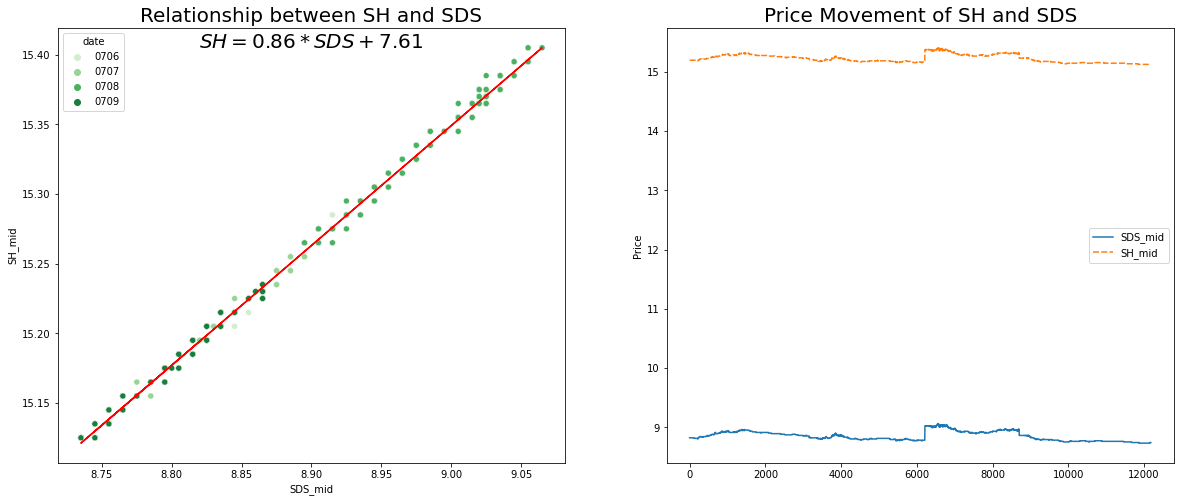

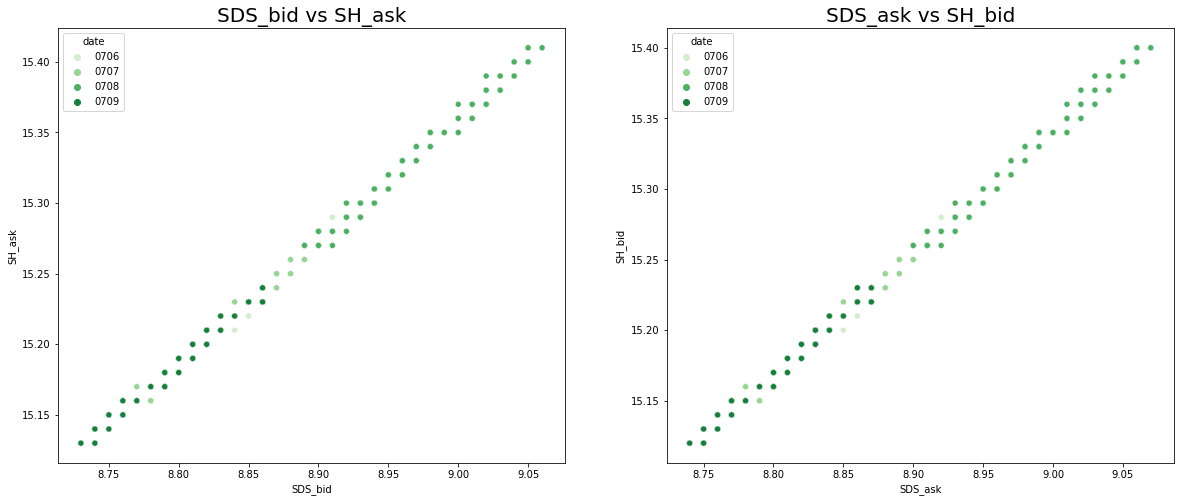

Regression Residuals Distribution


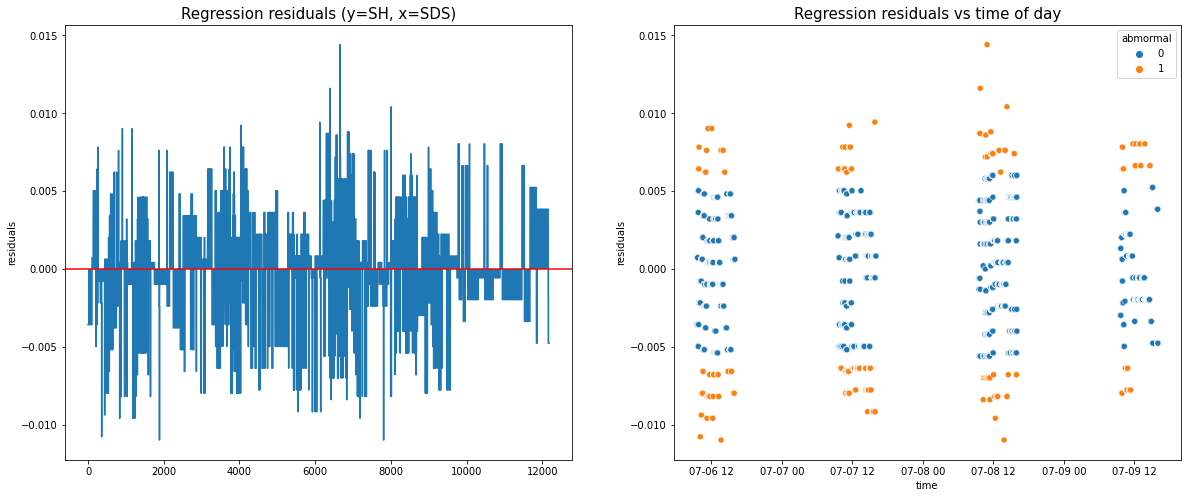

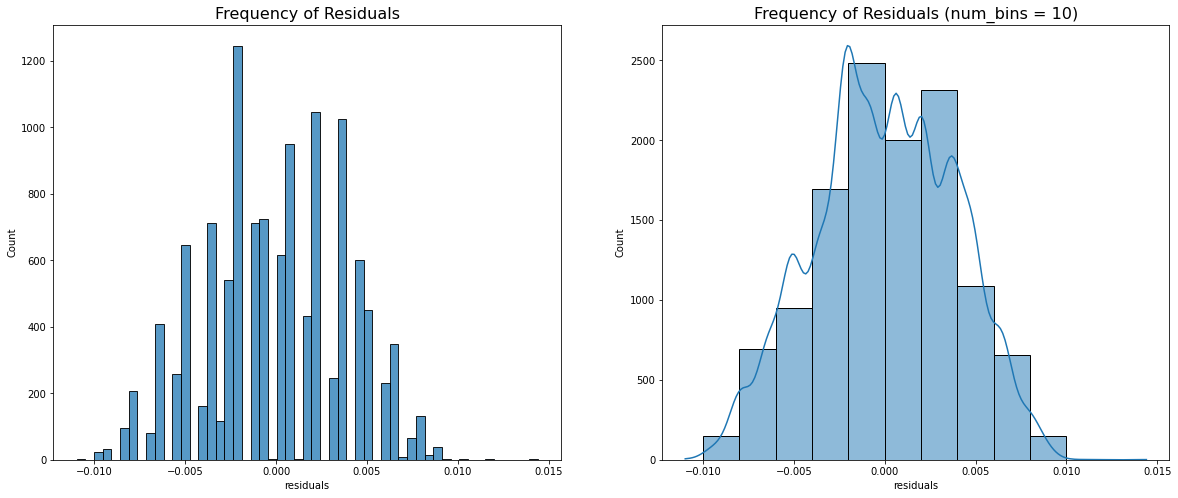

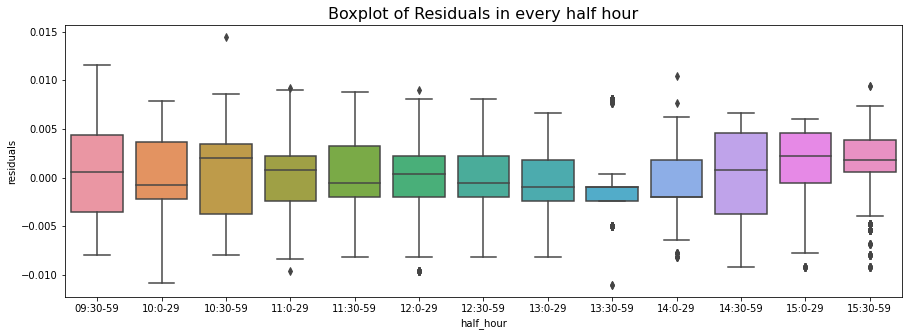

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.002267
1    0.000259
2   -0.001257
3   -0.003168
Name: pnl_abs, dtype: float64/n


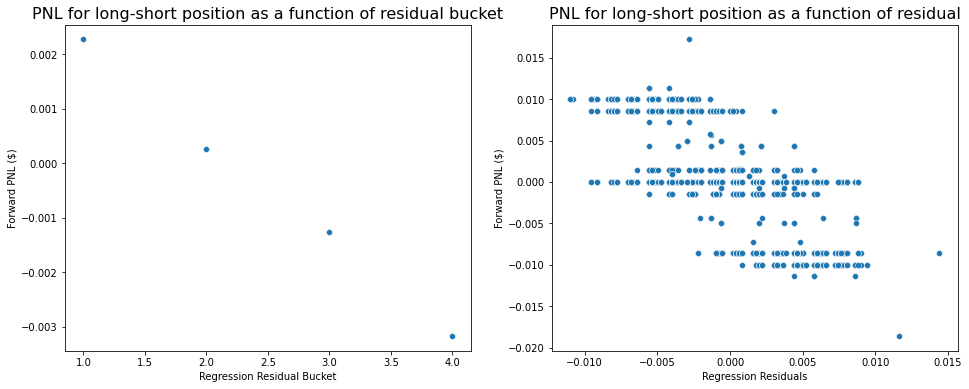

In [213]:
x_ticker, y_ticker = "SDS", "SH"   # "SPY", "SH", "SDS", "UPRO", "SSO", "SPXU"
x_mid_str, y_mid_str = "{}_mid".format(x_ticker), "{}_mid".format(y_ticker)

print("Relationship between {}({}) and {}({})".format(x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
data_pair, slope, constant = plot_multiple(all_data, TICKERS2INDEX[x_ticker], TICKERS2INDEX[y_ticker], period=None)
pred_y = constant + slope * data_pair[x_mid_str]

df = residual_analysis(data_pair, x_ticker, y_ticker, binrange=(-0.01, 0.01), num_bins=10, lookback_window=20)
df = partition_residual(df, lookback_window=20, num_bucket=4)
# print(x_ticker, y_ticker, slope, constant)
# arbitrary_bound(df, x_ticker, y_ticker, slope, constant, 20)

### (c) Split the discussion into large and small cap and compare within groups 

### Large Cap

1. Analysis of SPY(1x) and UPRO(3x)
Theoretical slope: 0.8116
Relationship between SPY(1x) and UPRO(3x)


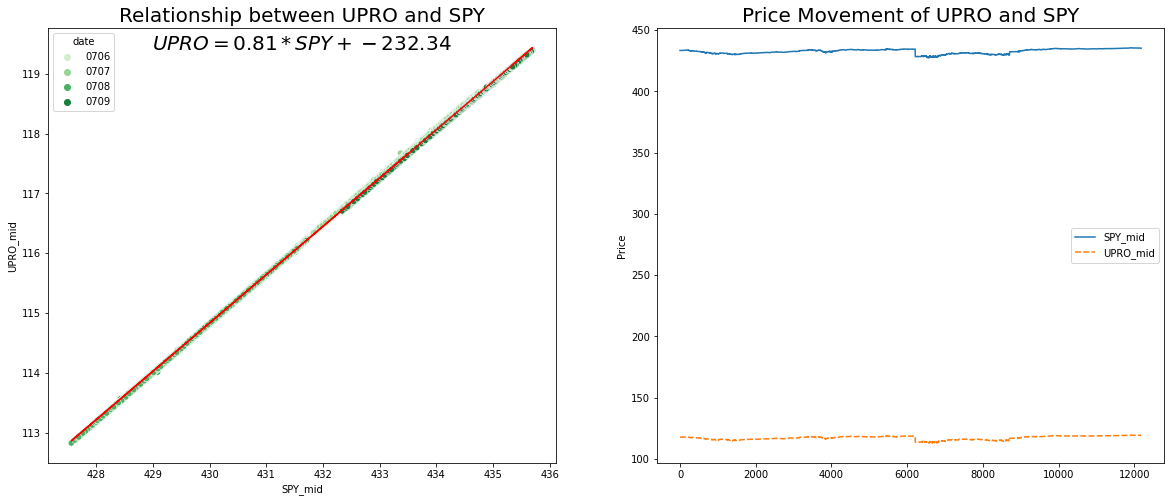

Regression Residuals Distribution


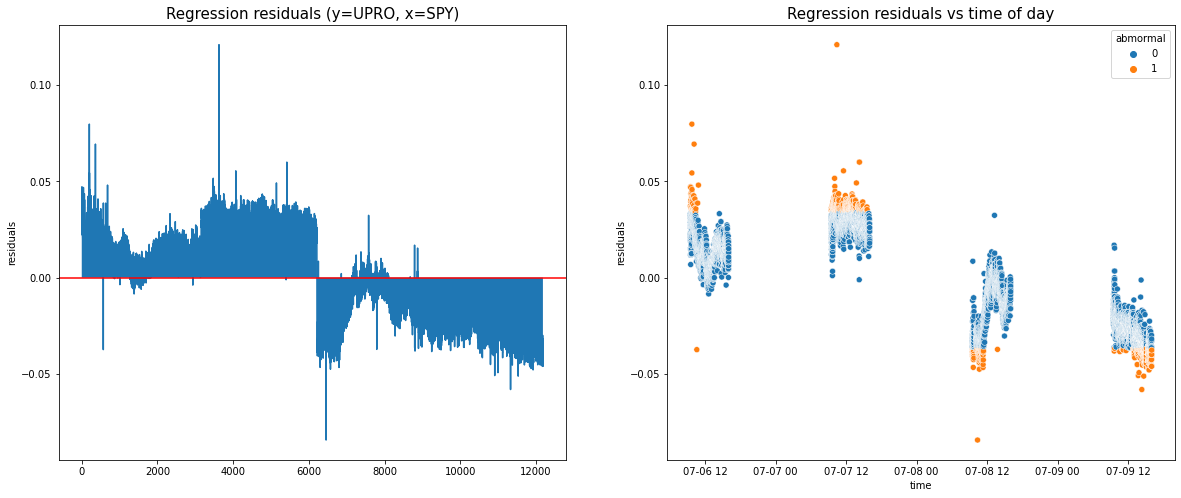

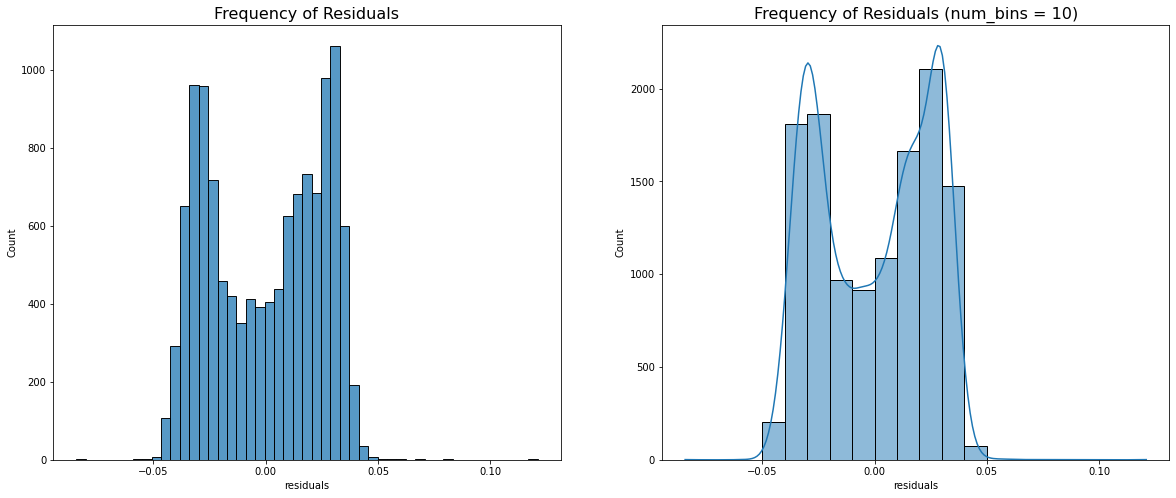

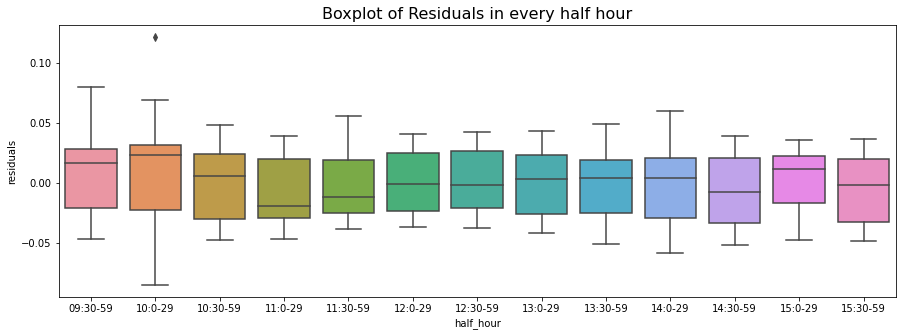

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.002683
1   -0.000027
2   -0.000881
3   -0.063536
Name: pnl_abs, dtype: float64/n


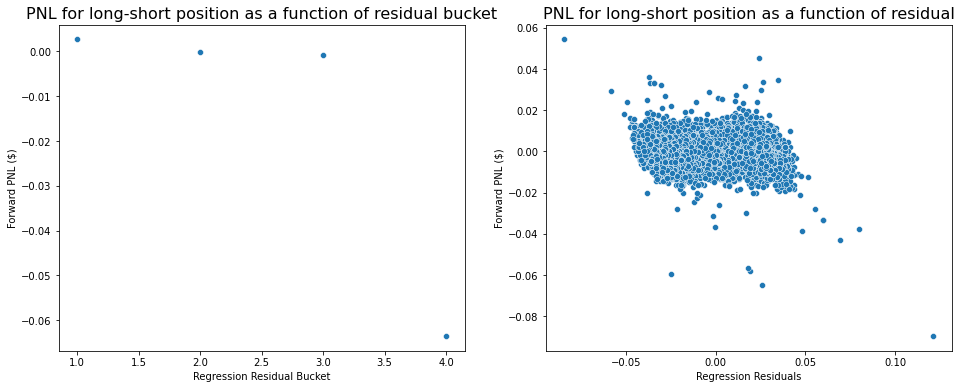


2. Analysis of SPY(1x) and SSO(2x)
Theoretical slope: 0.5633
Relationship between SPY(1x) and SSO(2x)


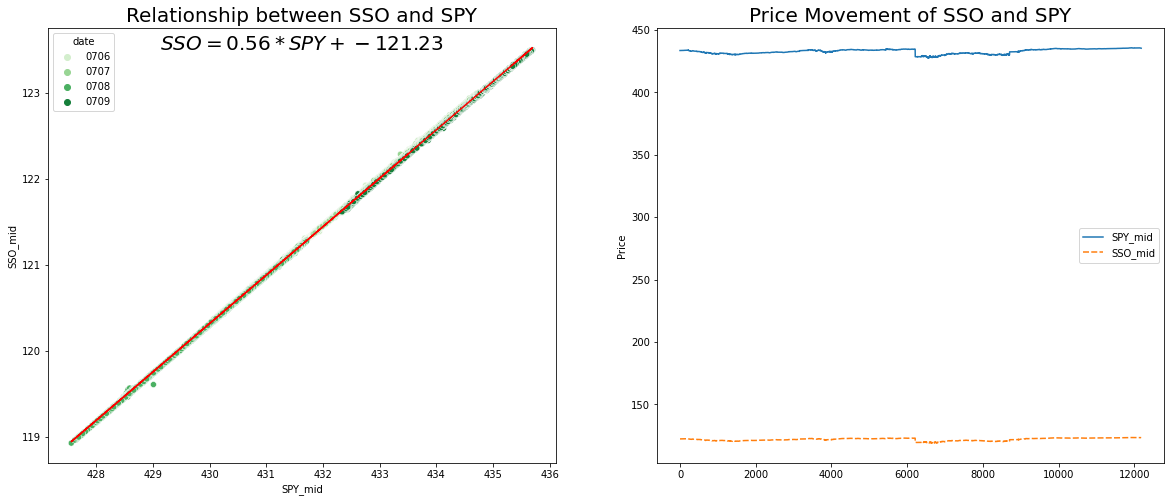

Regression Residuals Distribution


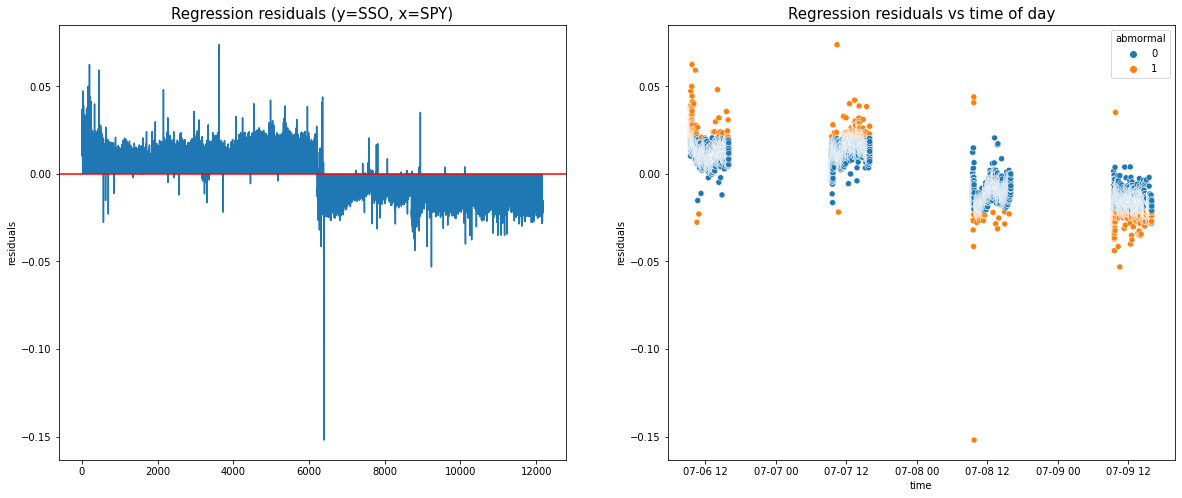

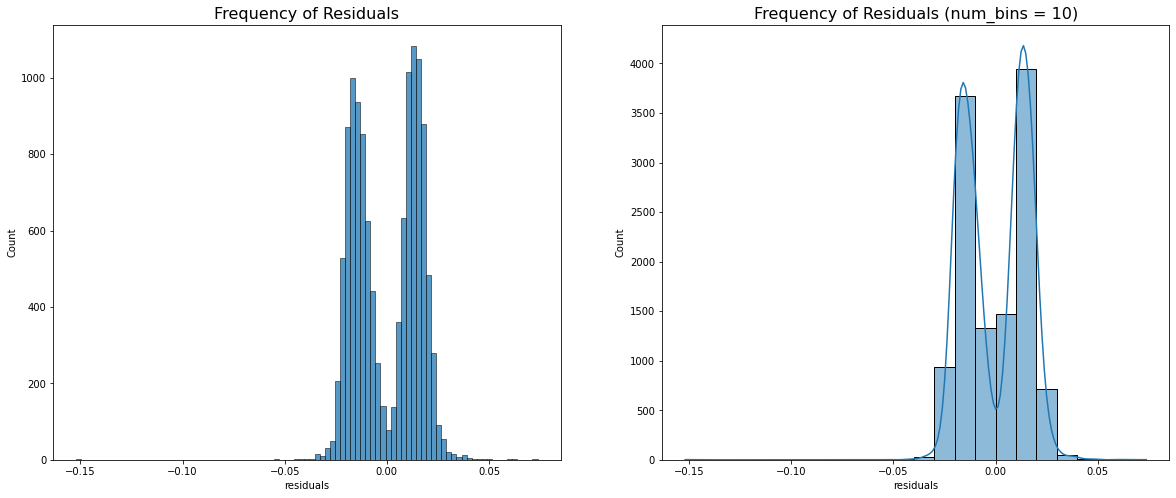

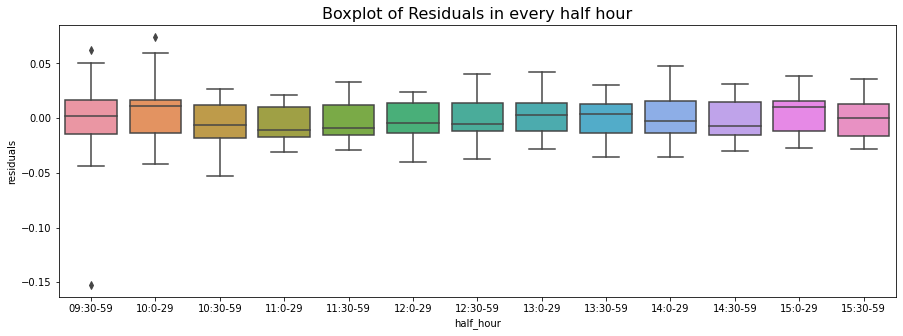

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.128365
1    0.035803
2    0.000392
3   -0.003007
Name: pnl_abs, dtype: float64/n


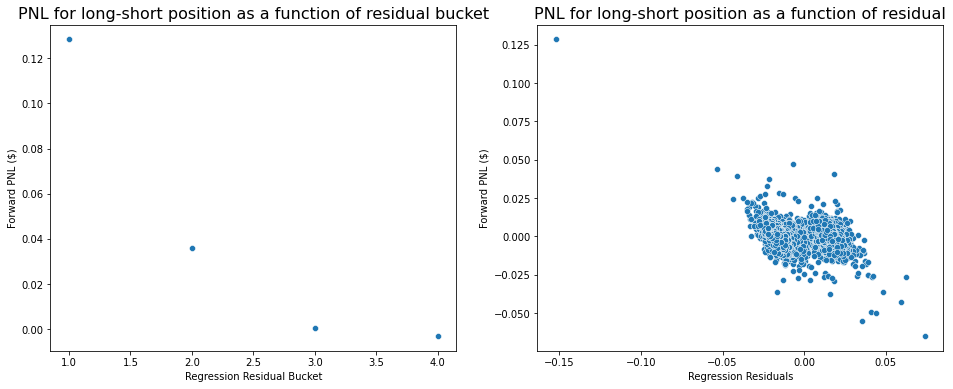


3. Analysis of UPRO(3x) and SSO(2x)
Theoretical slope: 0.694
Relationship between UPRO(3x) and SSO(2x)


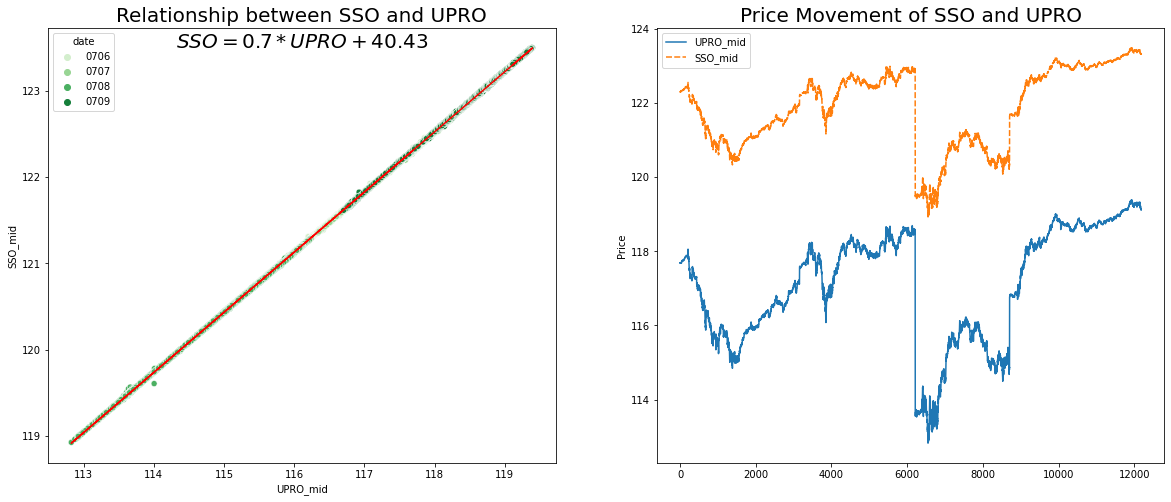

Regression Residuals Distribution


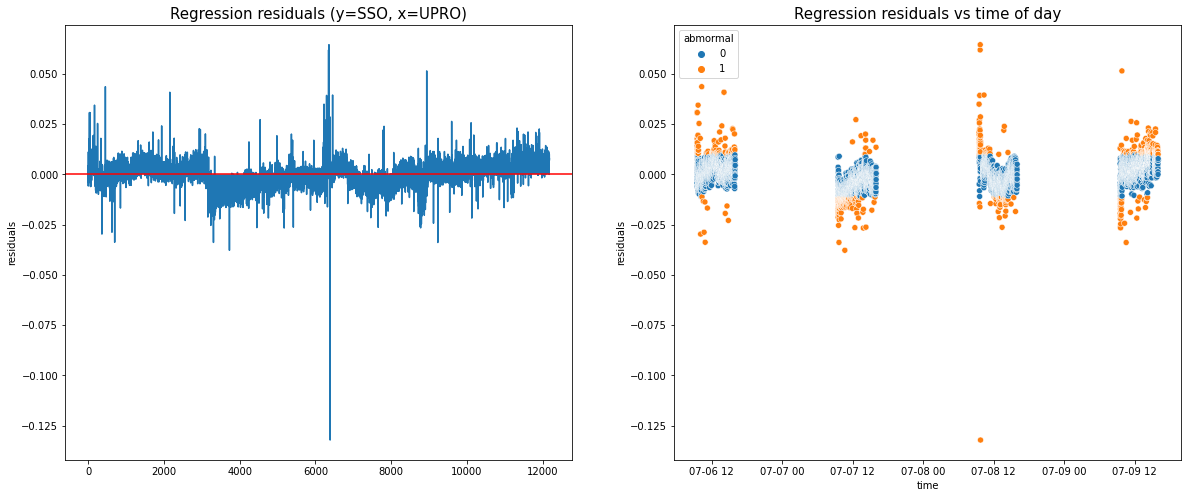

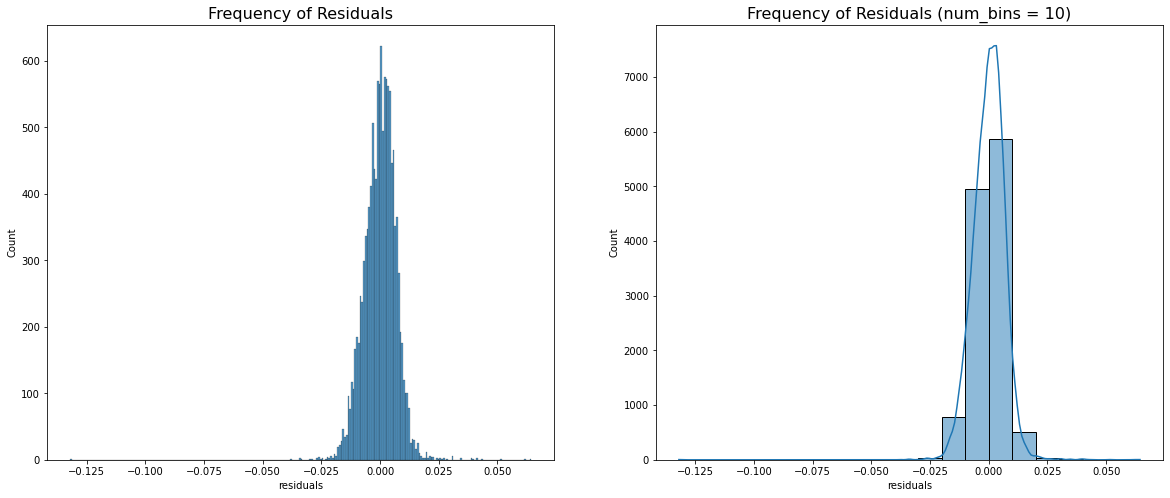

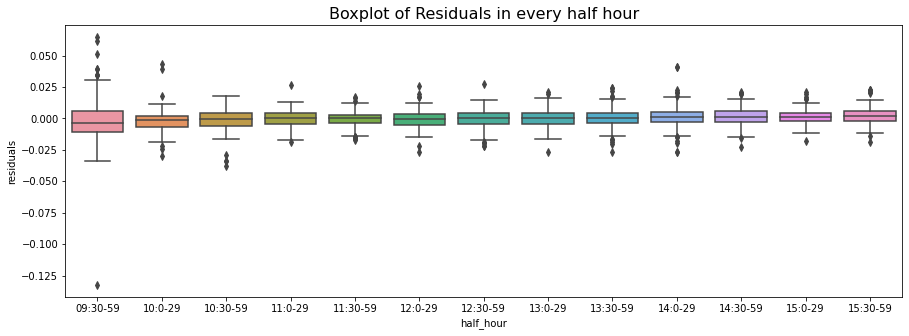

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.130657
1    0.037175
2    0.000100
3   -0.013391
Name: pnl_abs, dtype: float64/n


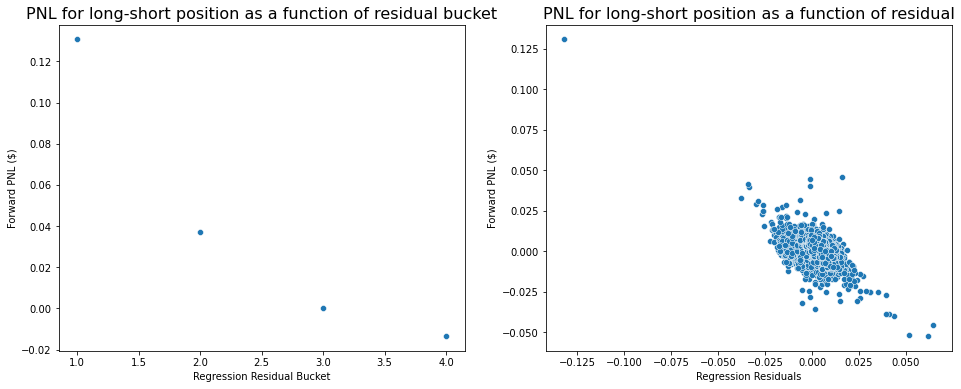

In [210]:
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(LARGE_CAP, 2)):
    x_idx, y_idx = TICKERS2INDEX[x_ticker], TICKERS2INDEX[y_ticker]
    slope_theta = get_theoretical_slope(all_data, x_idx, y_idx)
    
    if slope_theta > 1:
        x_ticker, y_ticker = y_ticker, x_ticker
        x_idx, y_idx = TICKERS2INDEX[x_ticker], TICKERS2INDEX[y_ticker]
        
    slope_theta = get_theoretical_slope(all_data, x_idx, y_idx)
    
    print("{}. Analysis of {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    print("Theoretical slope: {}".format(round(slope_theta, 4)))
    
    x_mid_str, y_mid_str = "{}_mid".format(x_ticker), "{}_mid".format(y_ticker)

    print("Relationship between {}({}) and {}({})".format(x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant = plot_multiple(all_data, TICKERS2INDEX[x_ticker], TICKERS2INDEX[y_ticker], period=None)
    pred_y = constant + slope * data_pair[x_mid_str]

    df = residual_analysis(data_pair, x_ticker, y_ticker, binrange=(-0.05, 0.05), lookback_window=20)
    df = partition_residual(df, lookback_window=20, num_bucket=4)
#     arbitrary_bound(df, x_ticker, y_ticker, slope, constant, 30)
    print("\n\n\n")

### Small cap

1. Analysis of SDS(-2x) and SH(-1x)
Relationship between SDS(-2x) and SH(-1x)


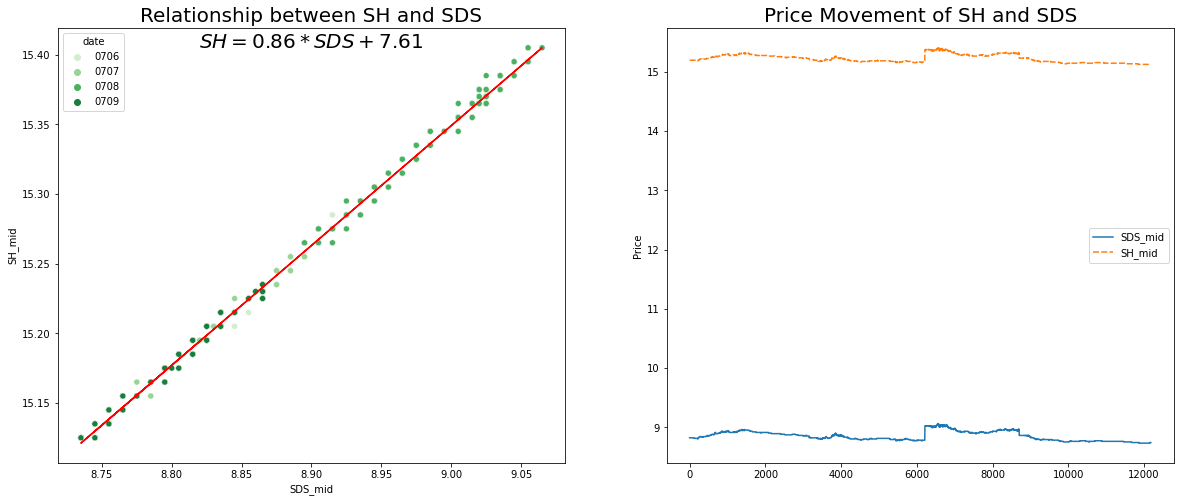

Regression Residuals Distribution


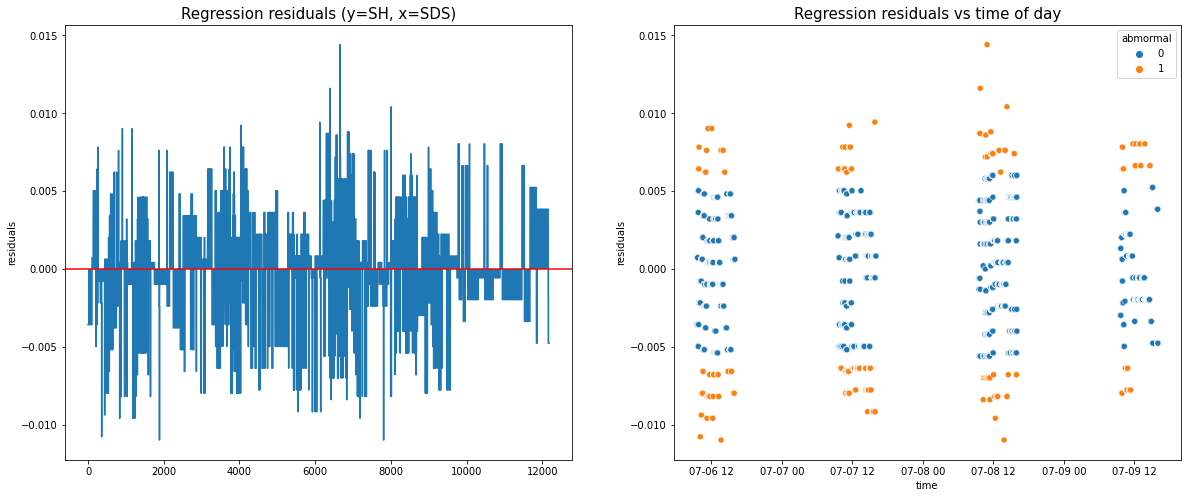

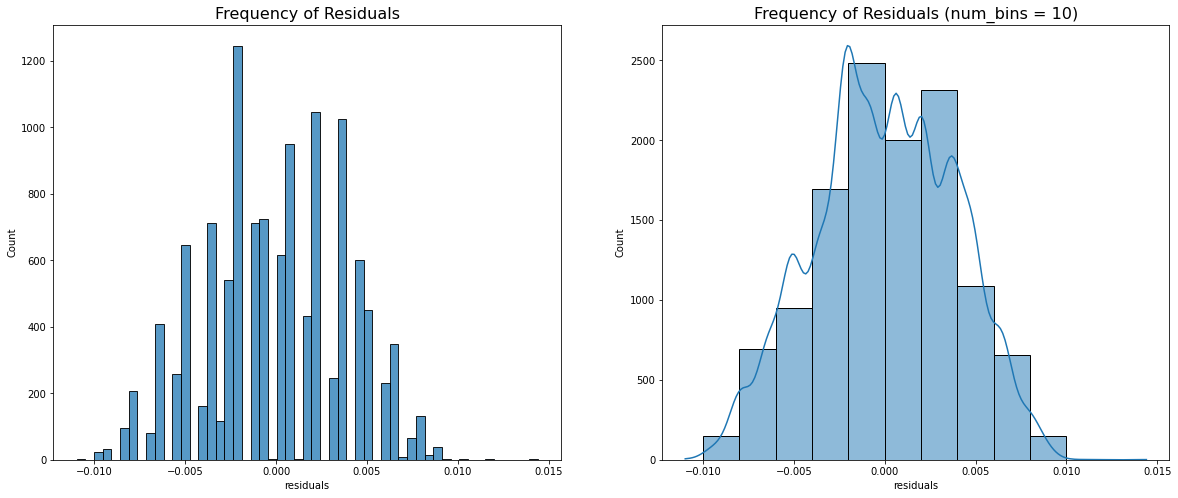

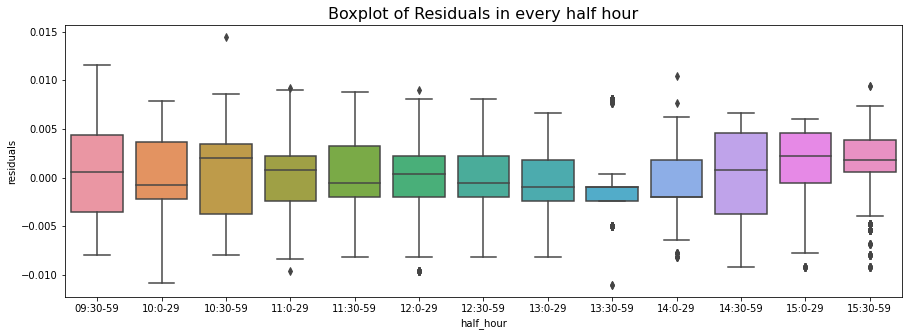

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.002267
1    0.000259
2   -0.001257
3   -0.003168
Name: pnl_abs, dtype: float64/n


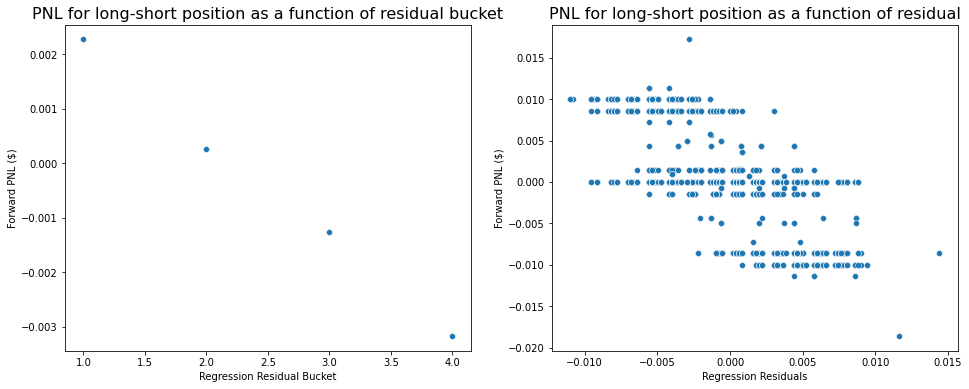


2. Analysis of SPXU(-3x) and SH(-1x)
Relationship between SPXU(-3x) and SH(-1x)


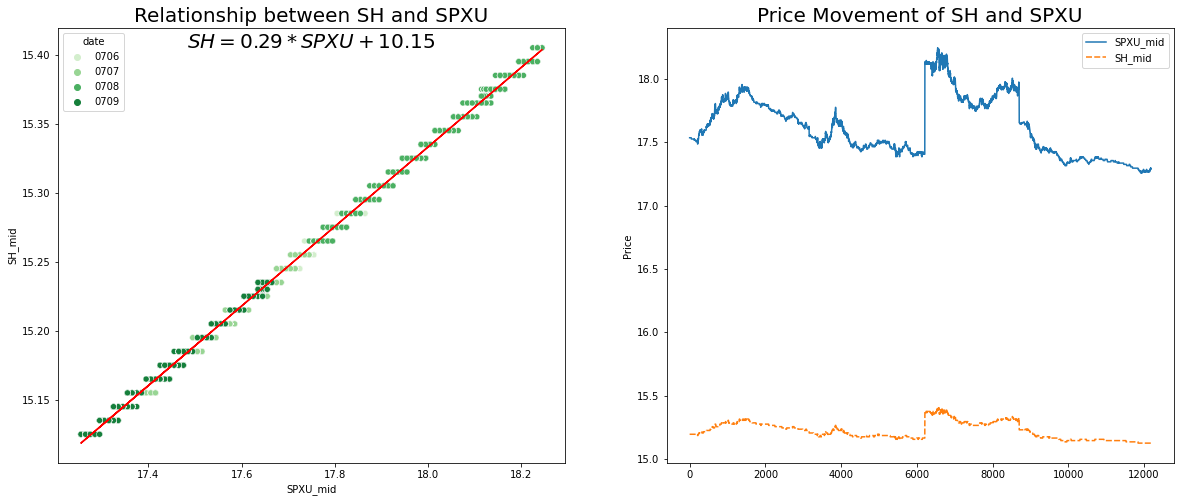

Regression Residuals Distribution


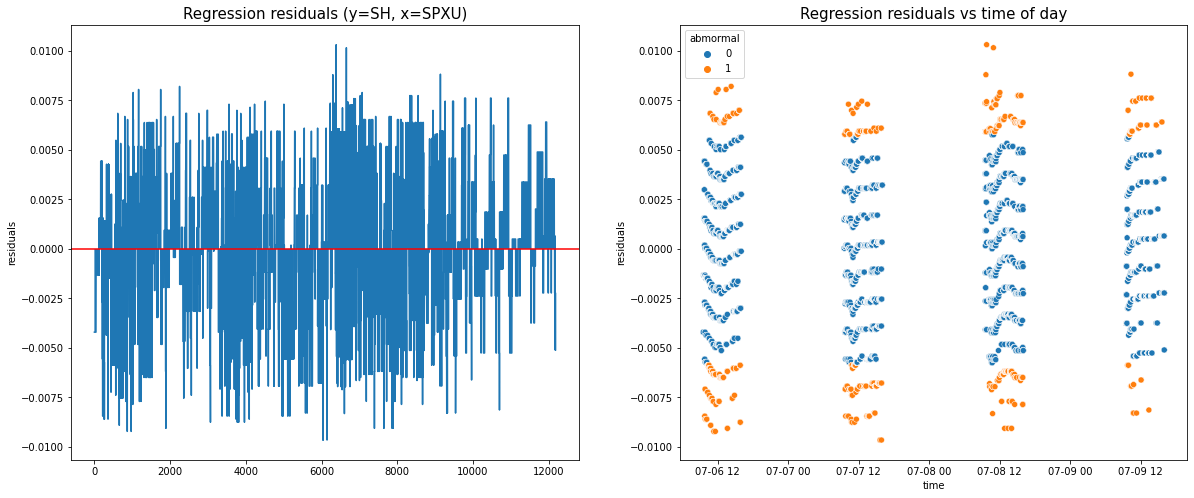

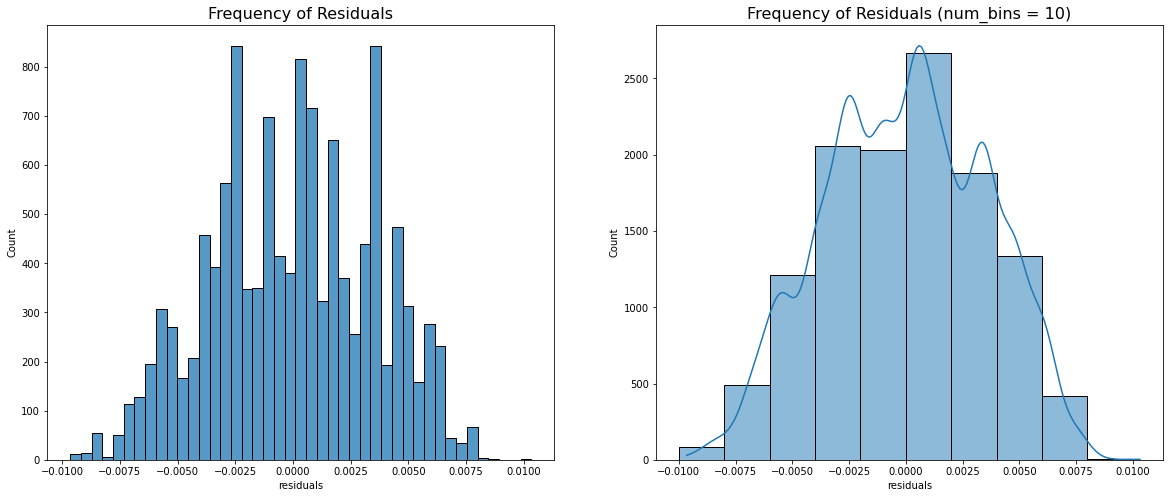

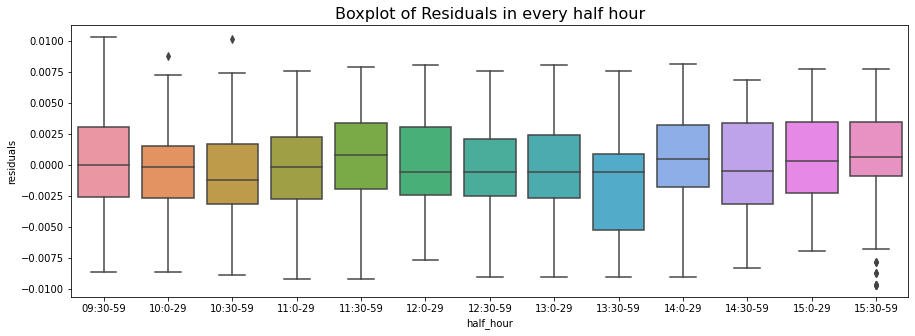

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.002120
1    0.000300
2   -0.000405
3   -0.003080
Name: pnl_abs, dtype: float64/n


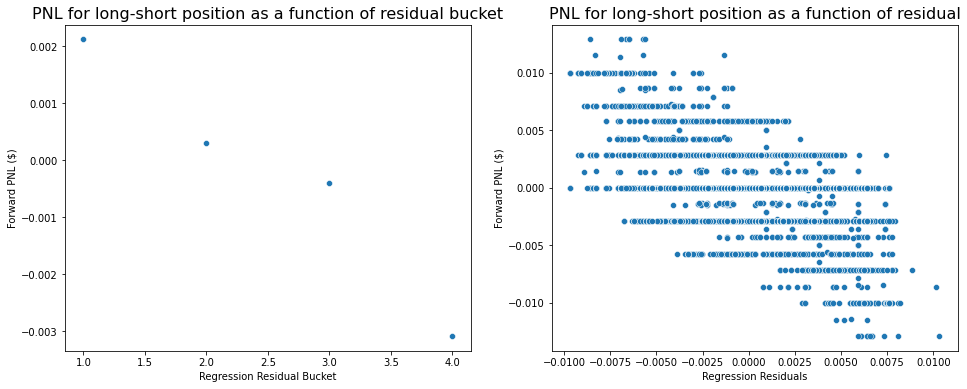


3. Analysis of SPXU(-3x) and SDS(-2x)
Relationship between SPXU(-3x) and SDS(-2x)


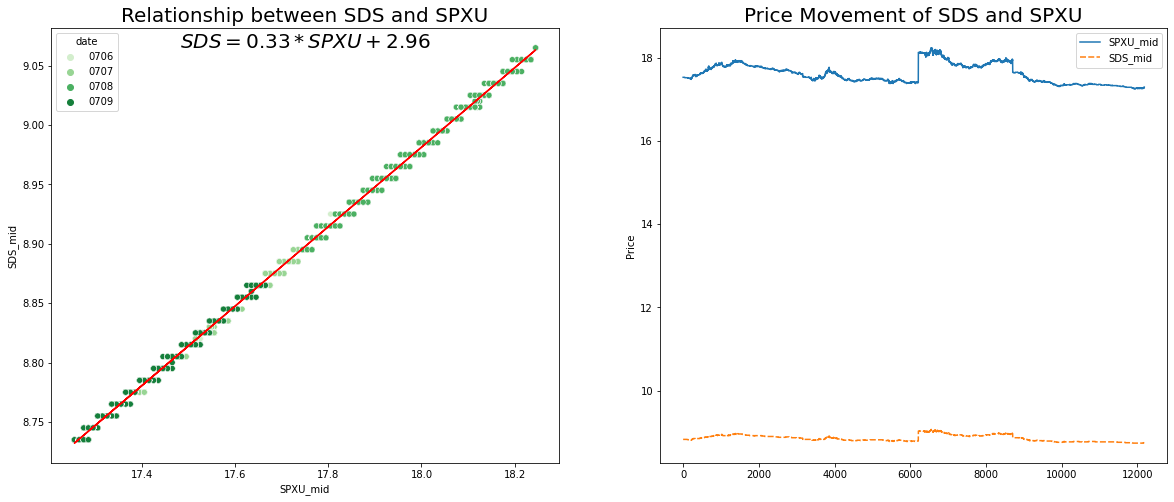

Regression Residuals Distribution


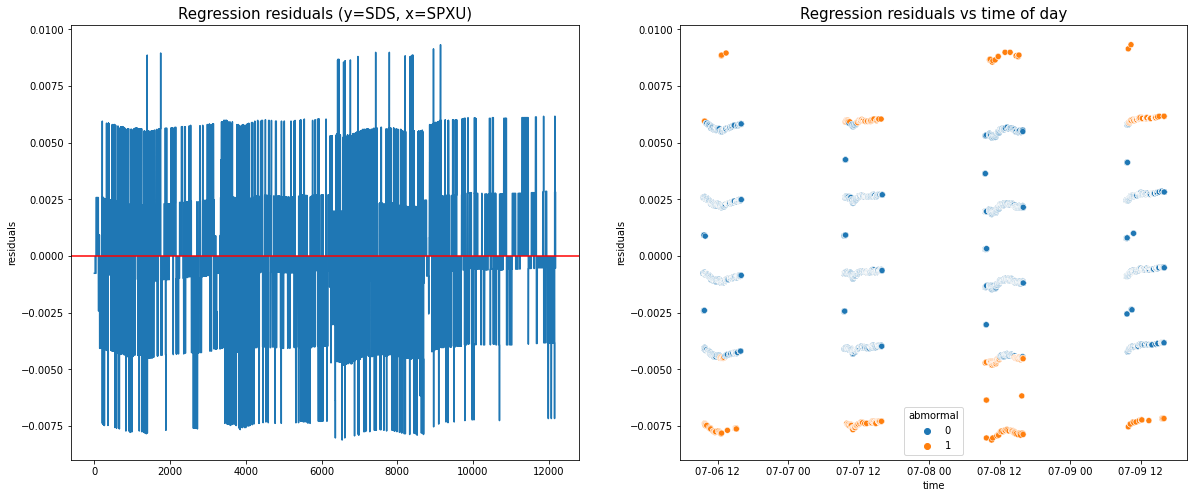

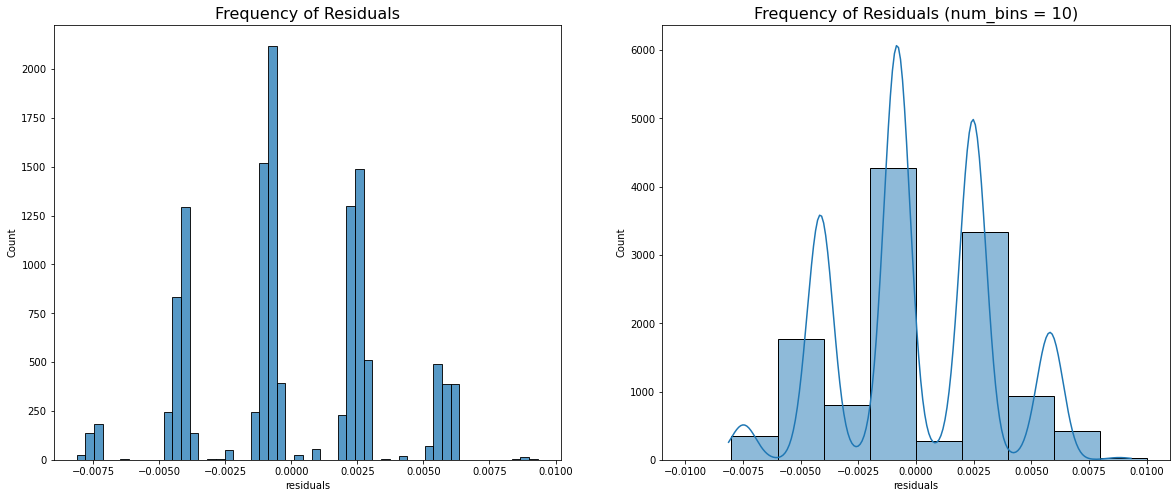

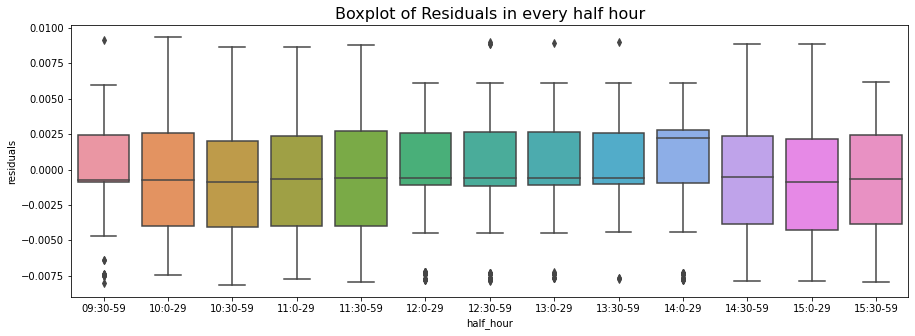

PnL vs Regression Residuals
Average 20 seconds pnl for 4 bucket:
residual_bucket
0    0.001801
1    0.000174
2   -0.000538
3   -0.002848
Name: pnl_abs, dtype: float64/n


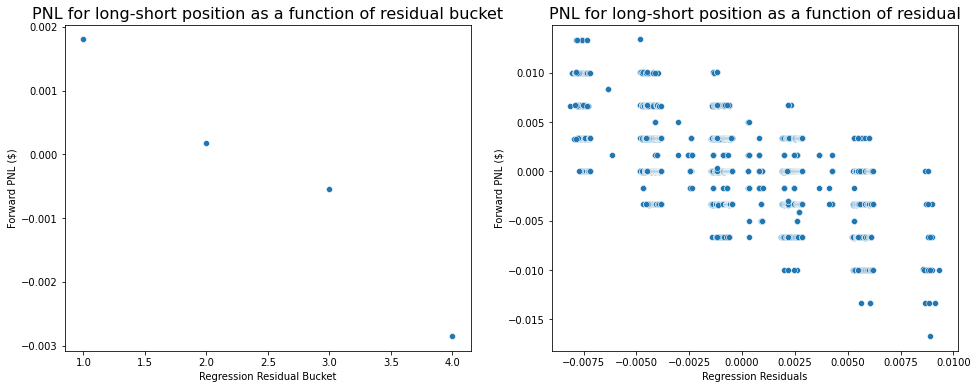

In [211]:
for i, (x_ticker, y_ticker) in enumerate(itertools.combinations(SMALL_CAP, 2)):
    x_idx, y_idx = TICKERS2INDEX[x_ticker], TICKERS2INDEX[y_ticker]
    
    slope_theta = get_theoretical_slope(all_data, x_idx, y_idx)
    
    if slope_theta > 1:
        x_ticker, y_ticker = y_ticker, x_ticker
        
    print("{}. Analysis of {}({}) and {}({})".format(i + 1, x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    x_mid_str, y_mid_str = "{}_mid".format(x_ticker), "{}_mid".format(y_ticker)

    print("Relationship between {}({}) and {}({})".format(x_ticker, LEVERAGES[x_ticker], y_ticker, LEVERAGES[y_ticker]))
    data_pair, slope, constant = plot_multiple(all_data, TICKERS2INDEX[x_ticker], TICKERS2INDEX[y_ticker], period=None)
    pred_y = constant + slope * data_pair[x_mid_str]
    
    df = residual_analysis(data_pair, x_ticker, y_ticker, binrange=(-0.01, 0.01), num_bins=10, lookback_window=20)
    df = partition_residual(df, lookback_window=20, num_bucket=4)
#     arbitrary_bound(df, x_ticker, y_ticker, slope, constant, 30)
    print("\n\n\n")